# Описание работы:

Перед нами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. 
<br><br>
[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Нам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

In [2]:
main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # проверка основного датасета

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
5,a387ab916f402cb3fbfffd29f68fd0ce,2,1,done,2018-06-23 08:18:07.476199+00,2018-06-23 08:18:09.552181+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Брифинг от заказчика,a25caa09-95d0-4e0c-b3c0-ad15f23bead8,True,False
6,a387ab916f402cb3fbfffd29f68fd0ce,1,3,done,2018-06-20 15:58:22.132468+00,2018-06-20 16:00:06.127191+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #1,a3d74174-08be-4634-949a-108d4f915fa6,True,False
7,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-23 08:31:00.338883+00,NaN,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True
8,a387ab916f402cb3fbfffd29f68fd0ce,1,2,done,2018-06-20 15:45:07.976223+00,2018-06-20 15:58:21.886722+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Специализация,558acc64-3867-4ada-ac6f-36e9a7922f68,True,False
9,a387ab916f402cb3fbfffd29f68fd0ce,1,5,done,2018-06-21 19:09:31.117521+00,2018-06-21 19:10:36.707919+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #2,7ea421f0-04b5-4df8-a76c-03e24692eba9,True,False


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Объединение датасетов в один общий датасет

students_df = pd.read_csv('students.csv')
courses_df = pd.read_csv('courses.csv', names=['course_id', 'course_title', 'course_field'])
course_contents_df = pd.read_csv('course_contents.csv')
progresses_df = pd.read_csv('progresses.csv', names=['progress_id', 'student_id', 'course_id'])
progress_phases_df = pd.read_csv('progress_phases.csv', parse_dates= ['start_date', 'finish_date'], dayfirst=True)

courses_df = courses_df.reset_index().iloc[:,1:].loc[1:,:]
courses = course_contents_df.merge(courses_df)
progresses_df = progresses_df.loc[1:,:]
progress = progress_phases_df.merge(progresses_df, how = 'left')
main = progress.merge(courses, how = 'left')

main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] #проверка

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,module_title,lesson_title,lesson_token,is_video,is_homework,course_title,course_field
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00:00,2018-06-23 08:28:52.439542+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,Веб-дизайн PRO 2.0,Design
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00:00,2018-06-20 15:45:07.717209+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False,Веб-дизайн PRO 2.0,Design
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00:00,2018-06-23 08:18:12.784616+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False,Веб-дизайн PRO 2.0,Design
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.361780+00:00,2018-06-21 19:09:30.845034+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False,Веб-дизайн PRO 2.0,Design
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,Веб-дизайн PRO 2.0,Design
5,a387ab916f402cb3fbfffd29f68fd0ce,2,1,done,2018-06-23 08:18:07.476199+00:00,2018-06-23 08:18:09.552181+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Брифинг от заказчика,a25caa09-95d0-4e0c-b3c0-ad15f23bead8,True,False,Веб-дизайн PRO 2.0,Design
6,a387ab916f402cb3fbfffd29f68fd0ce,1,3,done,2018-06-20 15:58:22.132468+00:00,2018-06-20 16:00:06.127191+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашнее задание #1,a3d74174-08be-4634-949a-108d4f915fa6,True,False,Веб-дизайн PRO 2.0,Design
7,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-23 08:31:00.338883+00:00,NaT,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True,Веб-дизайн PRO 2.0,Design
8,a387ab916f402cb3fbfffd29f68fd0ce,1,2,done,2018-06-20 15:45:07.976223+00:00,2018-06-20 15:58:21.886722+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Специализация,558acc64-3867-4ada-ac6f-36e9a7922f68,True,False,Веб-дизайн PRO 2.0,Design
9,a387ab916f402cb3fbfffd29f68fd0ce,1,5,done,2018-06-21 19:09:31.117521+00:00,2018-06-21 19:10:36.707919+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашнее задание #2,7ea421f0-04b5-4df8-a76c-03e24692eba9,True,False,Веб-дизайн PRO 2.0,Design


In [8]:
#1_1 Общее количество курсов в датасете

print('Общее количество курсов в датасете:',
      main['course_title'].nunique())

Общее количество курсов в датасете: 15


In [9]:
# Количество модулей на каждом курсе

print('\nКоличество модулей на каждом курсе:\n',
      main.groupby('course_title')['module_title'].nunique())


Количество модулей на каждом курсе:
 course_title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_title, dtype: int64


In [10]:
# Количество уроков в каждом модуле на каждом курсе

print('\nКоличество уроков в каждом модуле на каждом курсе:\n',
      main.groupby(['course_title','module_title'])['lesson_title'].nunique())


Количество уроков в каждом модуле на каждом курсе:
 course_title                   module_title                                       
Excel Базовый                   Визуализация данных Excel                              5
                               Основной функционал Excel                              11
                               Основной функционал Excel (продолжение)                 7
                               Сводные таблицы Excel                                   5
                               Формулы и функции Excel. Более сложные формулы          5
                                                                                      ..
Руководитель digital-проектов  Решение факапов. Lean/TOC. Обзор.                       5
                               Требовательность digital-продюсера                      4
                               Управление временем                                     4
                               Управление дизайнерами. Разработ

In [11]:
# Медианное количество уроков в модуле на каждом курсе

print('\nМедианное количество уроков в модуле на каждом курсе:\n',
      main.groupby('course_title').agg(lesson_count_median = ('lesson_number','median')))


Медианное количество уроков в модуле на каждом курсе:
                                      lesson_count_median
course_title                                            
Excel Базовый                                        4.0
Java-разработчик                                     4.0
Java-разработчик c нуля                              5.0
JavaScript с нуля                                    4.0
PHP-разработчик с 0 до PRO. Часть 1                  3.0
SMM-маркетолог от А до Я                             3.0
UX-дизайн                                            3.0
Анимация интерфейсов                                 2.0
Веб-вёрстка для начинающих 2.0                       4.0
Веб-дизайн PRO 2.0                                   3.0
Веб-дизайн Базовый                                   3.0
Веб-дизайн с нуля 2.0                                3.0
Веб-разработчик                                      1.0
Интернет-маркетолог от Ingate                        5.0
Руководитель digital-проектов   

In [12]:
# Количество учеников на каждом курсе

print('\nКоличество учеников на каждом курсе:\n',
      main.groupby('course_title')['student_id'].nunique())


Количество учеников на каждом курсе:
 course_title
Excel Базовый                           782
Java-разработчик                        763
Java-разработчик c нуля                 581
JavaScript с нуля                       966
PHP-разработчик с 0 до PRO. Часть 1     854
SMM-маркетолог от А до Я                506
UX-дизайн                              1151
Анимация интерфейсов                    598
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн PRO 2.0                     1711
Веб-дизайн Базовый                      518
Веб-дизайн с нуля 2.0                  2014
Веб-разработчик                         628
Интернет-маркетолог от Ingate          2168
Руководитель digital-проектов           685
Name: student_id, dtype: int64


In [4]:
#минимальный, максимальный, средний, медианный возраст студентов

birthday_df = students_df[['id','birthday']].dropna()
birthday_df['birthday'] = [None if (2022 - int((str(i)[:4]).replace('-', '9'))) < 15 
                           or (2022 - int((str(i)[:4]).replace('-', '')) >= 80) 
                           else i for i in birthday_df['birthday']]

birthday_df = birthday_df.dropna()
birthday_df['age'] = (pd.to_datetime(pd.datetime.now().date()) - pd.to_datetime(birthday_df['birthday']))
birthday_df['age'] = [int(i.replace('days', '')) // 365 for i in birthday_df['age'].astype(str)]

print('\nВозраст студентов:')
print(birthday_df['age'].min(), '- минимальный')
print(birthday_df['age'].max(), '- максимальный')
print(round(birthday_df['age'].mean(), 2), '- средний')
print(birthday_df['age'].median(), '- медианный')


Возраст студентов:
14 - минимальный
77 - максимальный
30.78 - средний
30.0 - медианный


C:\Users\c1a1t\AppData\Local\Temp/ipykernel_9476/2925433600.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  birthday_df['age'] = (pd.to_datetime(pd.datetime.now().date()) - pd.to_datetime(birthday_df['birthday']))


In [13]:
#минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

birthday_df.rename(columns={'id':'student_id'}, inplace = True)
course_df = main[['student_id', 'course_title']]
course_df = birthday_df.merge(course_df, how='left')
course_df.dropna().groupby('course_title').agg(
    age_max = ('age', 'max'), age_min = ('age', 'min'), age_mean = ('age', 'mean'), age_median = ('age', 'median'))

,age_max,age_min,age_mean,age_median
course_title,,,,
Excel Базовый,62,18,34.762091,35.0
Java-разработчик,66,16,31.270338,30.0
Java-разработчик c нуля,56,16,31.546453,31.0
JavaScript с нуля,61,15,30.195107,29.0
PHP-разработчик с 0 до PRO. Часть 1,76,15,32.651370,31.0
SMM-маркетолог от А до Я,53,19,30.417333,30.0
UX-дизайн,59,17,31.830997,31.0
Анимация интерфейсов,53,17,31.376740,31.0
Веб-вёрстка для начинающих 2.0,61,15,30.264459,29.0


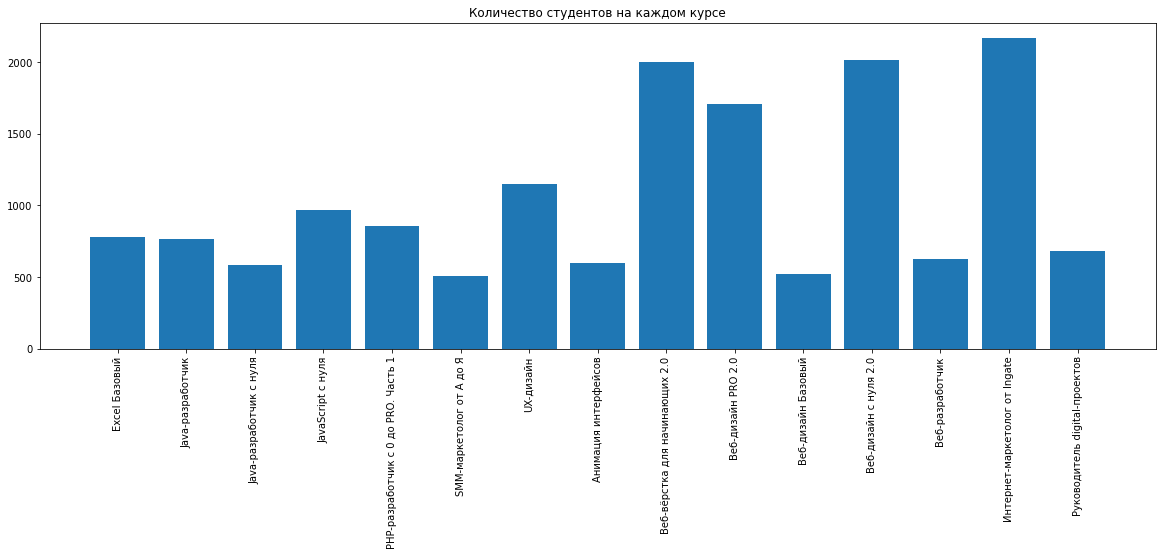

In [6]:
#1_2 Bar-chart, отражающий количество студентов на каждом курсе.

data_stud = main.groupby('course_title')['student_id'].nunique().reset_index()
fig, ax = plt.subplots(figsize=(20,6))
ax.bar(data_stud.course_title, data_stud.student_id)
plt.xticks(rotation = 90)
plt.title('Количество студентов на каждом курсе')
plt.show()

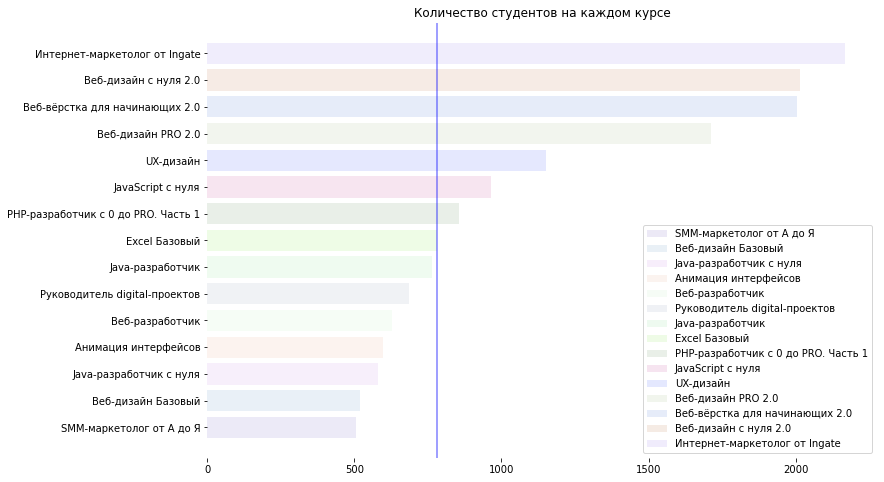

In [7]:
#1_3 Горизонтальный bar-chart, отражающий количество студентов на каждом курсе.

data_stud = data_stud.sort_values('student_id')
fig, ax = plt.subplots(figsize=(12,8))
axs = ax.barh(data_stud.course_title, data_stud.student_id, color = np.random.rand(15, 3), alpha = 0.1,
              label = data_stud.course_title)
m_line = data_stud.student_id.median()
plt.vlines(m_line, 0, 1, color='blue', label = 'медиана', transform = ax.get_xaxis_transform(), alpha = 0.5)
plt.box(on=None)
plt.title('Количество студентов на каждом курсе')
plt.legend(axs, data_stud.course_title)
plt.show()

In [4]:
#1_4 Выводы.

# Выполнив все заданные расчеты, была получена информация о данных по структуре каждого курса, по количеству студентов 
# на каждом курсе и их возрасту.

# Анализируя данные можно сделать вывод о том что занимаеющиеся студенты имеют возраст преимущественно от 29 до 31 лет.
# В этот период жизни у людей встречается желание сменить существующую профессию, образование, или дополнить имеющееся.

# У студентов в таком возрасте пользуются популярностью курсы связанные с вэб-разработкой и веб дизайном.
# А так же "Excel Базовый", "Интернет-маркетолог от Ingate", "Java-разработку", 
# что можно связать с относительной простотой освоения.

# Рассматривая график "Количество студентов на каждом курсе" можно выделить наиболее популярные курсы у студентов,
# количество которых превышает 1000 человек на курсе. К ним относятся "Интернет-маркетолог от Ingate", "Веб-дизайн с нуля 2.0",
# "Веб-верстка для начинающих 2.0", "Веб-дизайн PRO 2.0", "UX-дизайн".
# Можно заметить, что помимо марктинга самым популярным направлением обучения является дизайн и веб-разработка.

# Линия медианы количества студентов расположилась на отметке между 500 и 1000.
# Курсы с количеством студентов ниже этого значения: "Excel Базовый", "Java-разработчик", "Руководитель digital проектов",
# "Веб-разработчик", "Анимация интерфейсов", "Java-разработчик с нуля", "Веб-дизайн Базовый", "SMM-маркетолог от А до Я".


## 2. Расчет потенциальной нагрузки на преподавателей

In [47]:
#2_1 Рассчёт прироста студентов на каждом курсе в каждом месяце за всю историю

df_main = main[(main['start_date'] >= '2016-03-01') & (main['start_date'] <= '2019-07-31')]
df_main['start_date'] = [i[:7] for i in df_main['start_date'].astype(str)]
df = df_main[(df_main['module_number'] == 1) & (df_main['is_homework'] == True)]

data = df.groupby(['start_date','course_title']).agg(growth=('student_id','nunique')).reset_index()
data_list = [i for i in data.start_date.unique()]
data


,start_date,course_title,growth
0,2016-03,Веб-разработчик,1
1,2016-11,UX-дизайн,2
2,2017-04,UX-дизайн,1
3,2017-04,Веб-разработчик,1
4,2017-05,UX-дизайн,1
...,...,...,...
221,2019-07,Веб-дизайн PRO 2.0,40
222,2019-07,Веб-дизайн с нуля 2.0,76
223,2019-07,Веб-разработчик,4
224,2019-07,Интернет-маркетолог от Ingate,91


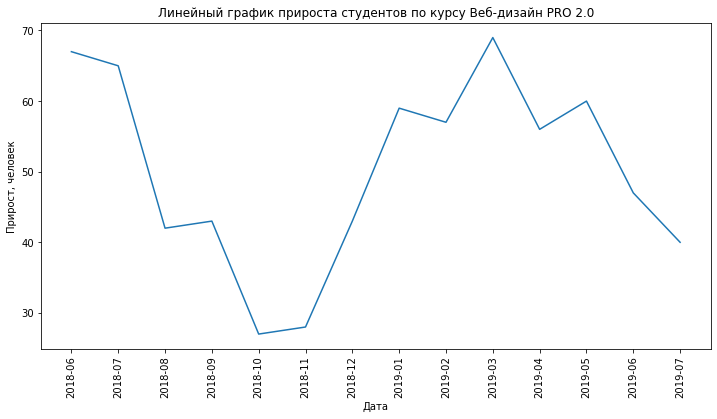

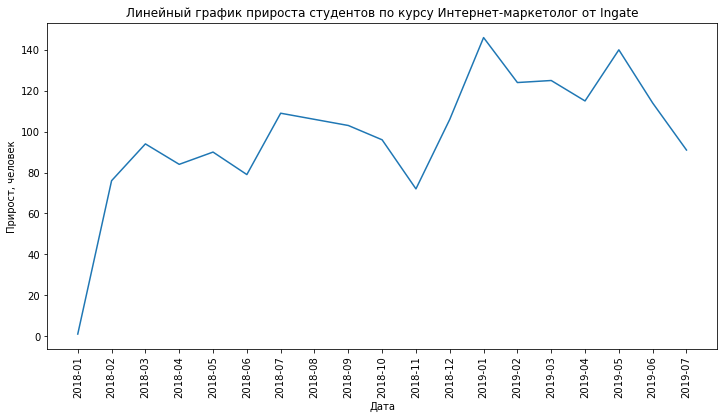

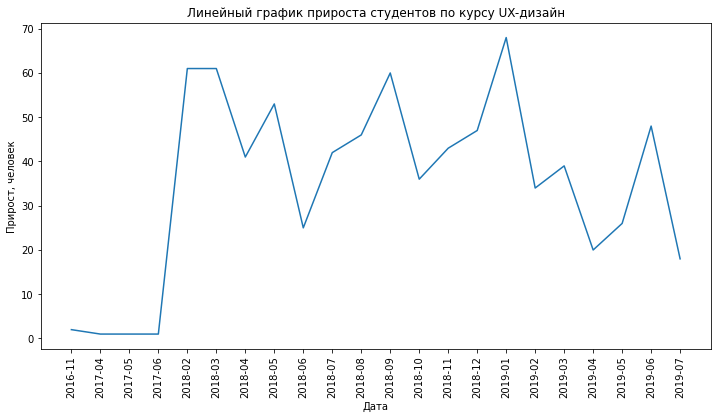

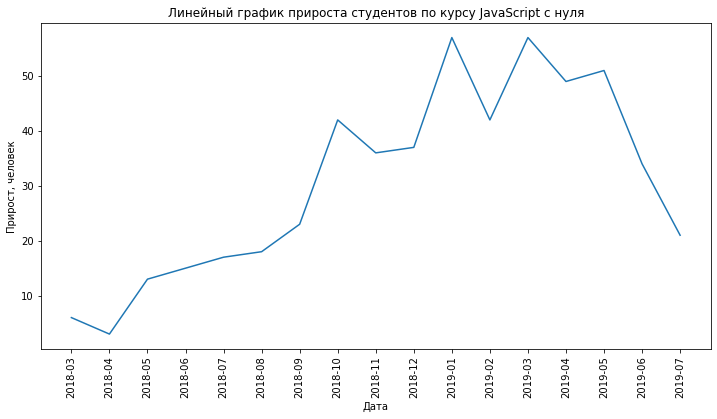

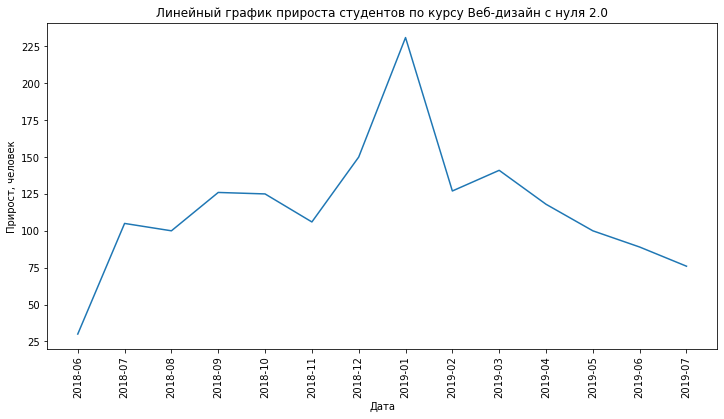

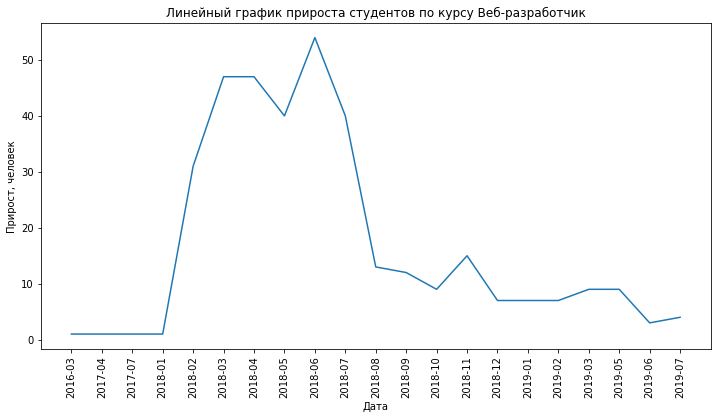

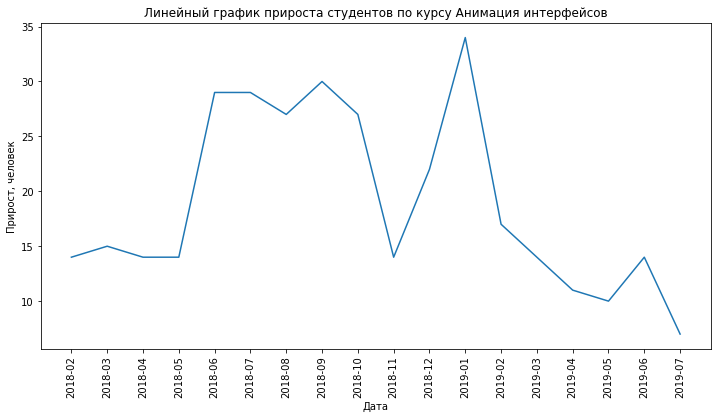

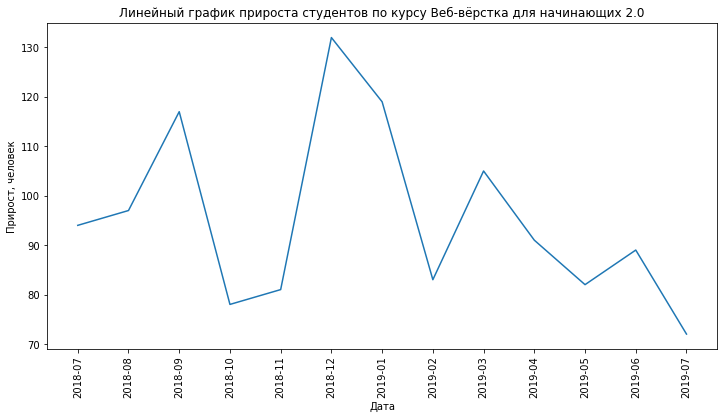

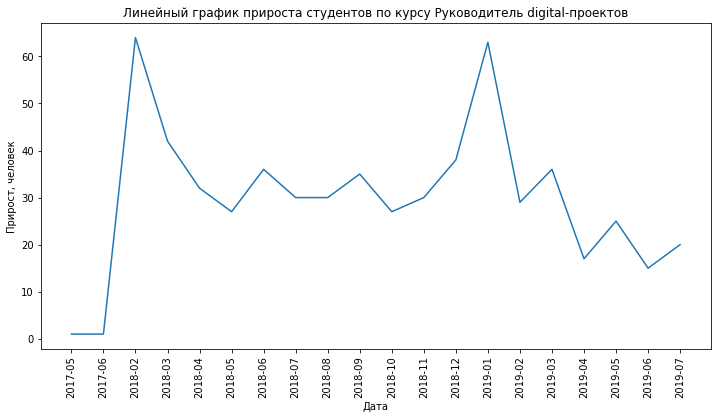

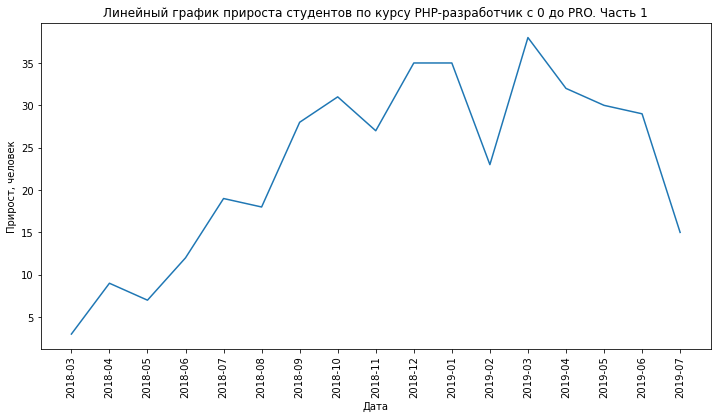

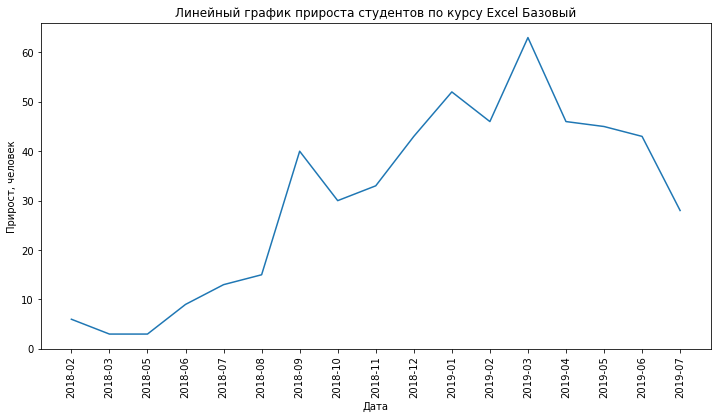

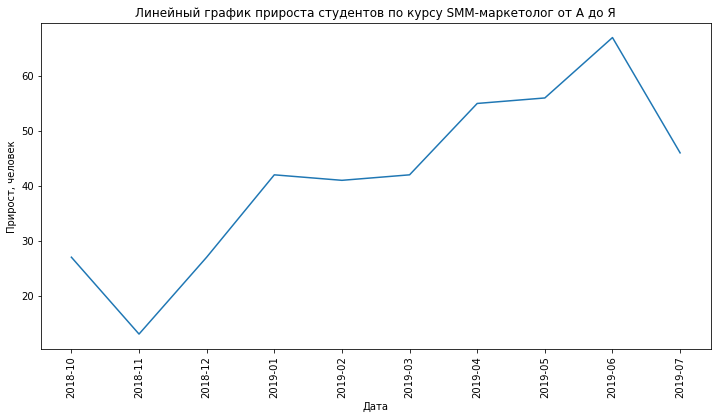

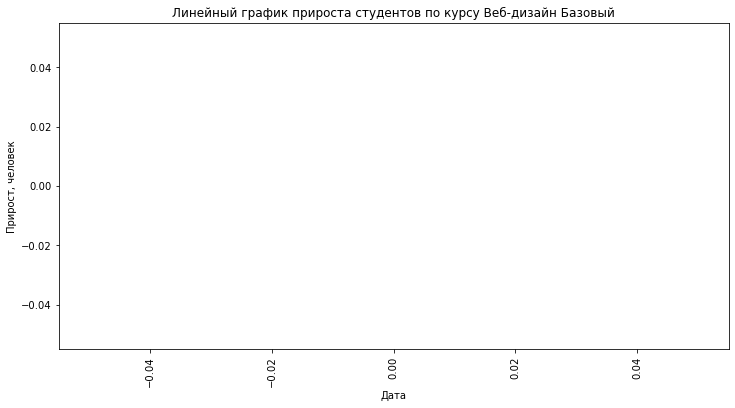

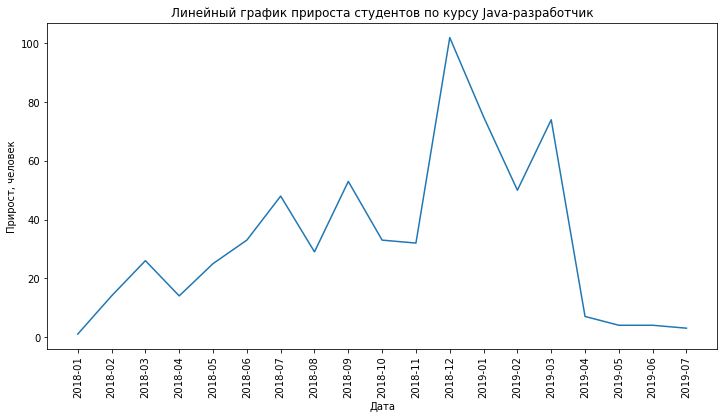

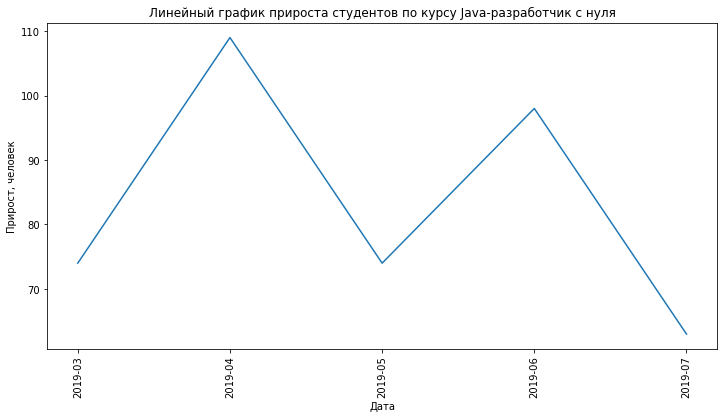

In [50]:
#2_2 line-graph с приростом студентов в каждом месяце для каждого курса.

course_list = [i for i in main['course_title'].unique()]
for course in course_list:
    dt = data[data['course_title'] == course].groupby('start_date')['growth'].sum()    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(dt)
    ax.set_title(f'Линейный график прироста студентов по курсу {course}')
    ax.set_xlabel('Дата')
    plt.xticks(rotation = 90)
    ax.set_ylabel('Прирост, человек')
    
plt.show()


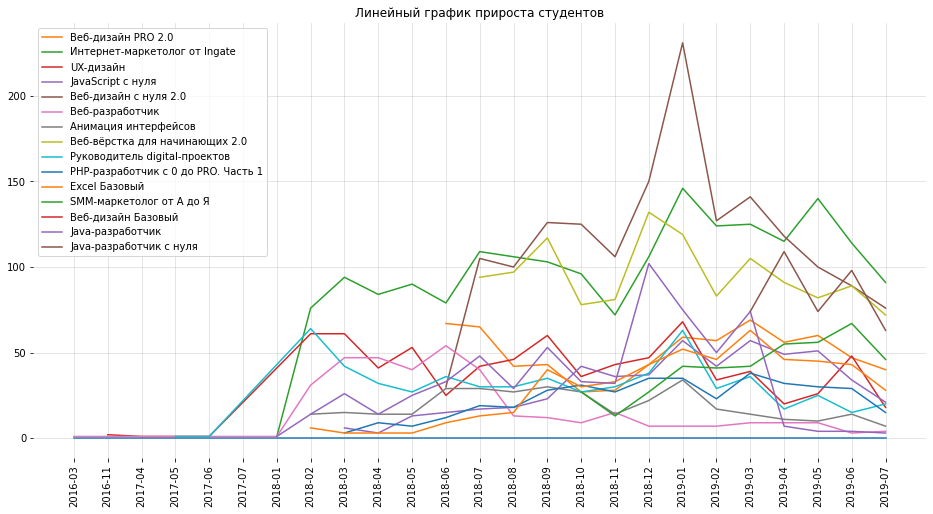

In [149]:
#2_3 На основании первого пункта построить line-graph с несколькими линиями, 
# отражающими прирост студентов в каждом месяце для каждого курса.

# Для корректного отображения я сначала построил "пустой" график с разметкой по датам на всем диапазоне значений.
# затем на него уже "добавлялись" графики со значениями по каждому курсу.

fig, ax = plt.subplots(figsize = (16,8))                   
x_ticks = (data['start_date'])
y_ticks = ([0 for i in data['growth']])
ax.plot(x_ticks, y_ticks)

for course in course_list:
    dt = data[data['course_title'] == course].groupby('start_date')['growth'].sum()  
    ax.plot(dt, label = course)
    
ax.set_title('Линейный график прироста студентов')   
plt.xticks(rotation = 90)    
plt.grid(color='grey', linestyle='-', linewidth=1, alpha = 0.2)    
plt.box(on = None)    
plt.legend()    
plt.show()

In [48]:
#2_4 Рассчёт количества прогрессов по выполнению домашних работ в каждом месяце за всю историю 
# Создание нового датасета на основе общего

homework_df = df_main[df_main['is_homework']==True]
homework_df['finish_date'] = [i[:7] for i in homework_df['finish_date'].astype(str)]
homework_df['finish_date'] = ['2019-07' if i == 'NaT' else i for i in homework_df['finish_date'].astype(str)]
progress_df = homework_df[['course_title','start_date','finish_date']].reset_index()

date_list = [i for i in progress_df['start_date']] #Создание списка дат 
course_title_list = [i for i in progress_df['course_title']] #Создание соответствующих им названий курсов

for val in progress_df[['start_date','finish_date','course_title']].values:
    exp_date_list = [str(i)[:7] for i in pd.date_range(val[0], val[1], freq='M')][1:] 
    date_list.extend(exp_date_list) # Добавление промежуточных(дополнительных) дат в список
    
    if len(exp_date_list) != 0:
        for i in range(len(exp_date_list)):
            course_title_list.append(val[2]) #Добавление соответствующих им названий курсов
        
answ_df = pd.DataFrame({'course_title': course_title_list, 'date': date_list})
answ_df['progress_count'] = 1
answ_df

C:\Users\c1a1t\AppData\Local\Temp/ipykernel_13200/620351993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homework_df['finish_date'] = [i[:7] for i in homework_df['finish_date'].astype(str)]
C:\Users\c1a1t\AppData\Local\Temp/ipykernel_13200/620351993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homework_df['finish_date'] = ['2019-07' if i == 'NaT' else i for i in homework_df['finish_date'].astype(str)]


,course_title,date,progress_count
0,Веб-дизайн PRO 2.0,2018-06,1
1,Веб-дизайн PRO 2.0,2018-06,1
2,Интернет-маркетолог от Ingate,2018-03,1
3,Интернет-маркетолог от Ingate,2018-02,1
4,Веб-дизайн с нуля 2.0,2018-10,1
...,...,...,...
103574,UX-дизайн,2019-04,1
103575,UX-дизайн,2019-05,1
103576,UX-дизайн,2019-06,1
103577,Веб-вёрстка для начинающих 2.0,2019-05,1


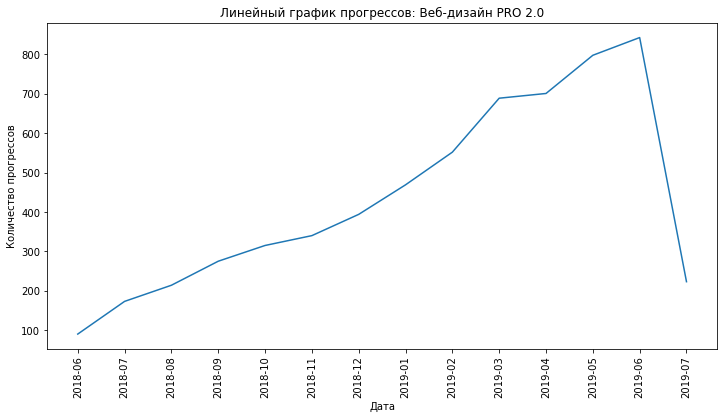

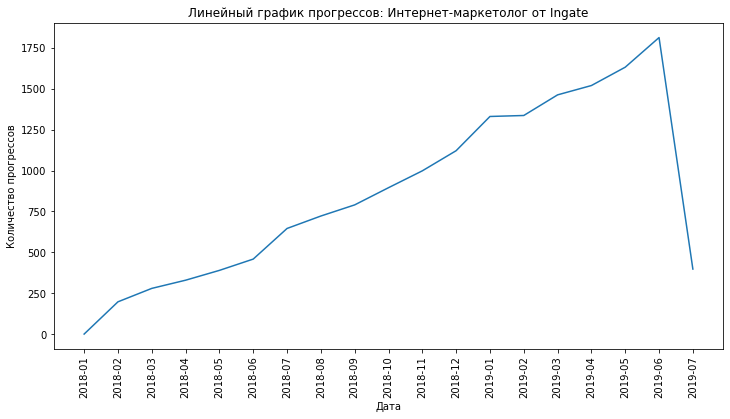

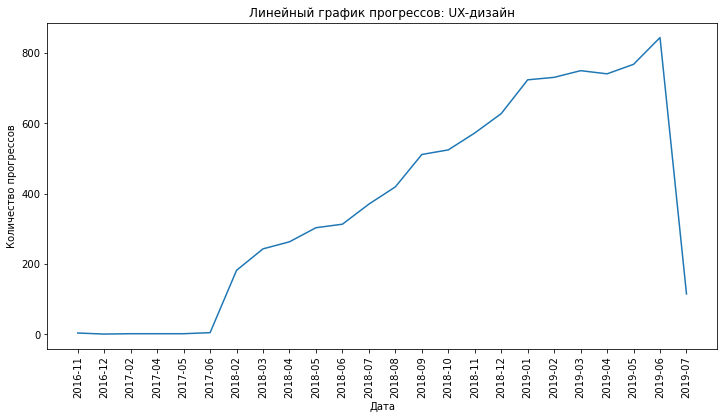

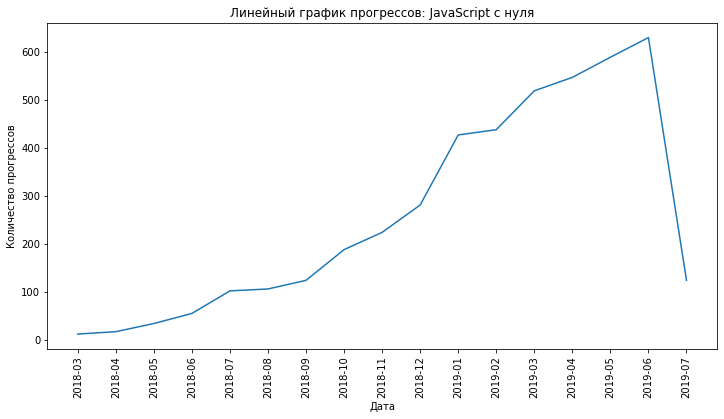

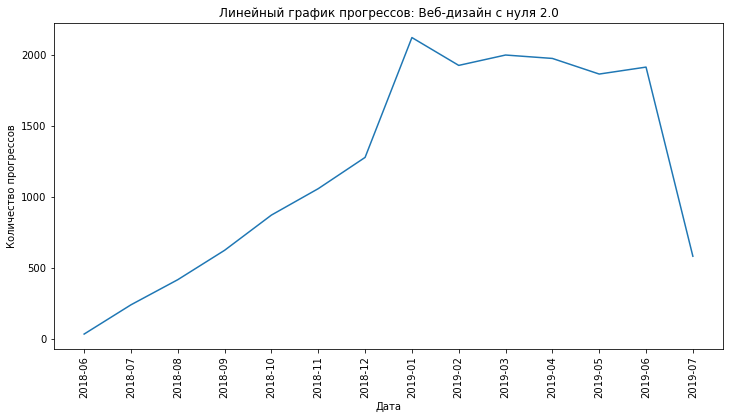

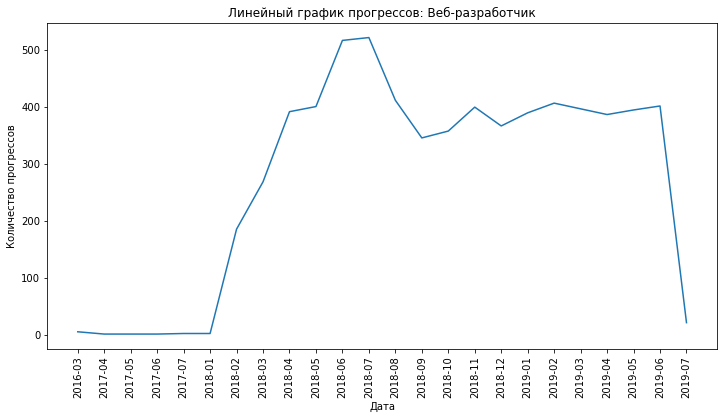

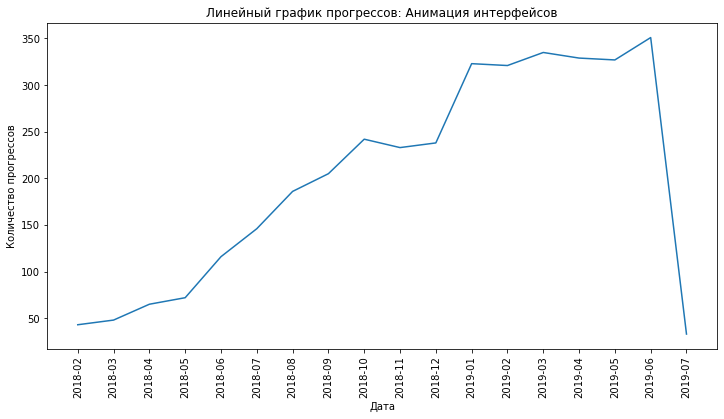

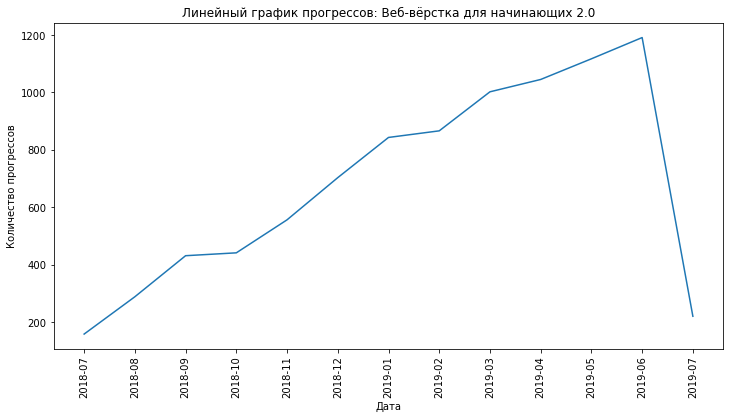

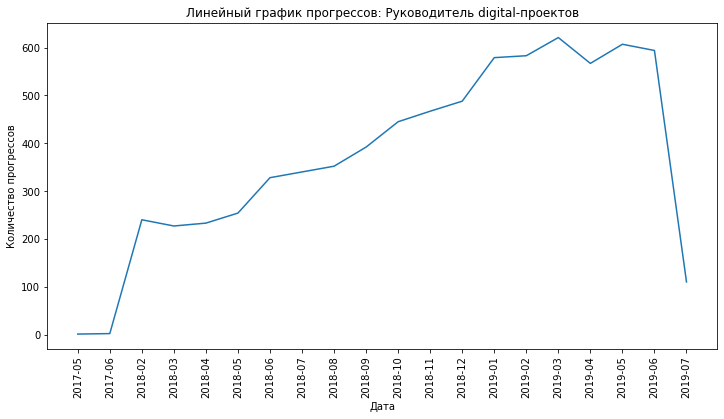

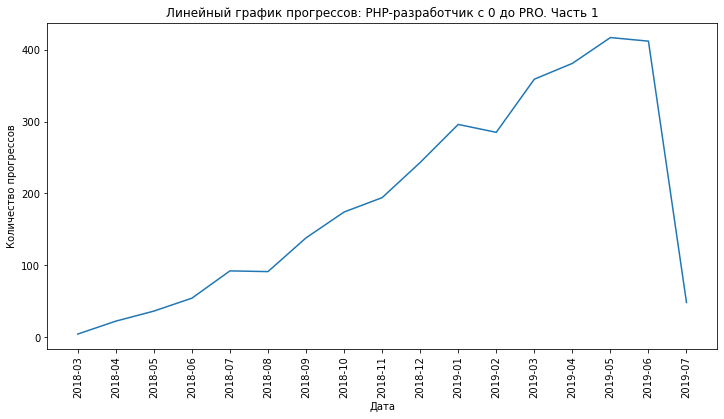

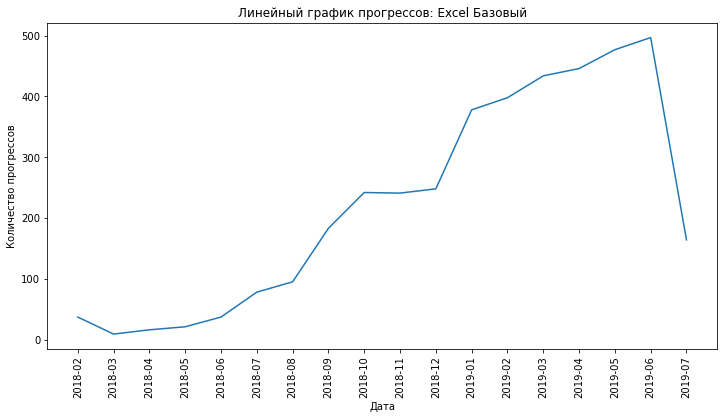

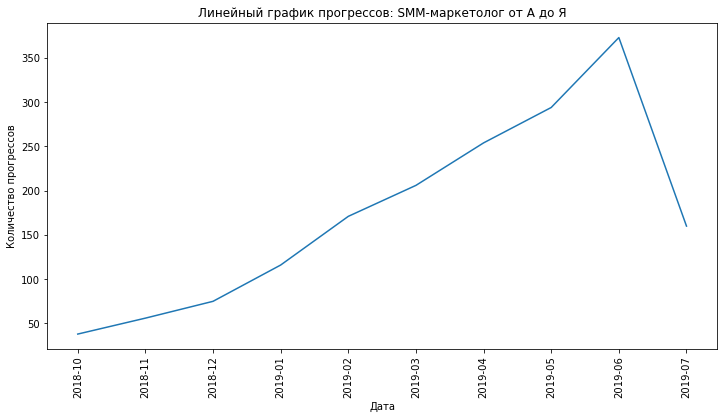

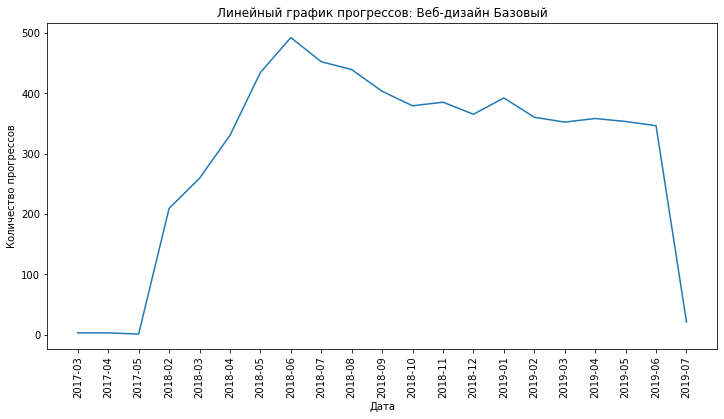

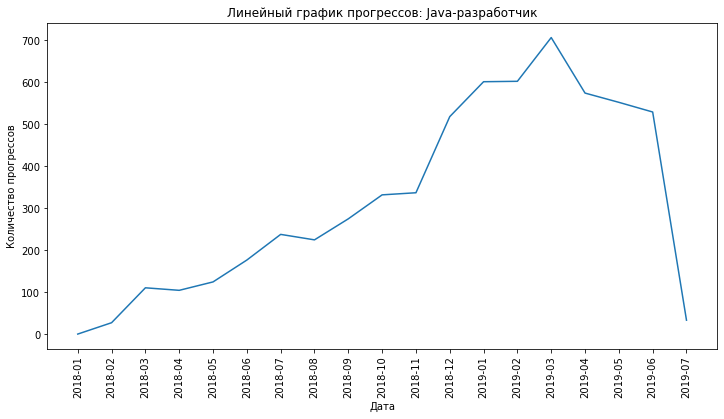

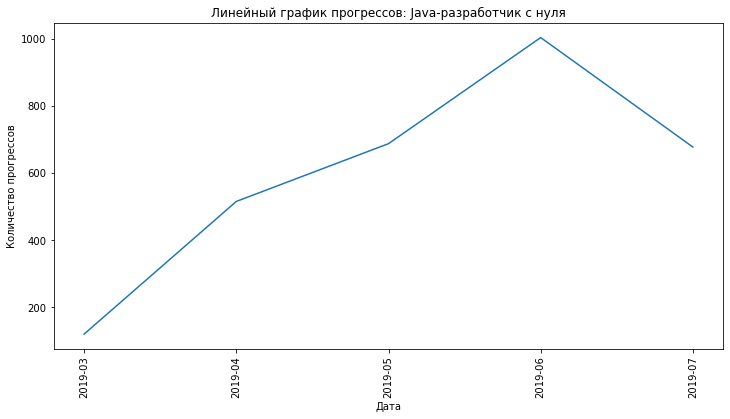

In [160]:
#2_5 line-graph по четвертому пункту.

for course in course_list:
    dt5 = answ_df[answ_df['course_title'] == course].groupby('date')['progress_count'].sum() 
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(dt5)
    ax.set_title(f'Линейный график прогрессов: {course}')
    ax.set_xlabel('Дата')
    plt.xticks(rotation = 90)
    ax.set_ylabel('Количество прогрессов')

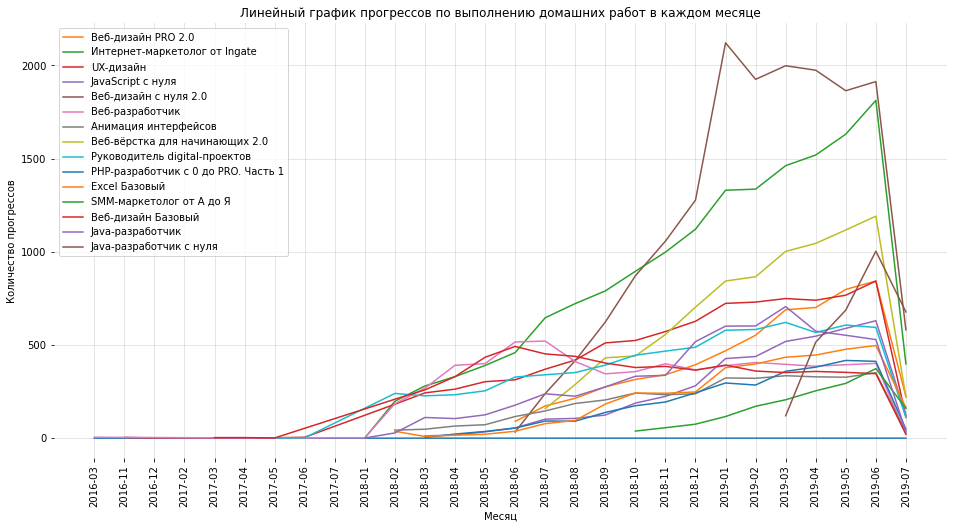

In [51]:
#2_6 line-graph для всех курсов по четвертому пункту.

fig, axs = plt.subplots(figsize=(16,8))
x_ticks = (answ_df['date'].sort_values())
y_ticks =  ([0 for i in range(len(x_ticks))])
axs.plot(x_ticks, y_ticks)

for course in course_list:
    dt6 = answ_df[answ_df['course_title'] == course].groupby('date')['progress_count'].sum()  
    axs.plot(dt6, label = course)
    
axs.set_title('Линейный график прогрессов по выполнению домашних работ в каждом месяце')
axs.set_xlabel('Месяц')
axs.set_ylabel('Количество прогрессов')
plt.xticks(rotation = 90)
plt.grid(color='grey', linestyle='-', linewidth=1, alpha = 0.2)  
plt.box(on = None)    
plt.legend()    
plt.show()


In [ ]:
#2_7 Выводы.

# Выполнив расчеты и построив график прироста учащихся по всем курсам, можно заметить некоторую сезонность,
# основные приросты студентов наблюдаются в зимнее время начиная с ноября-декабря.
# В летние месяцы заметно снижение прироста судентов.

# Анализируя график количества прогрессов, можно так же заметить сезонность количества выполняемых заданий.
# Основной пик совпадает с периодом набора новых студентов в начале года, снижение прогрессов наблюдается в летние периоды.
# По некоторым курсам снижение наблюдается в период начала нового учебного года,
# вероятно это зависит от совмещающих с учебой студентов.

# Наибольшие показатели здесь имеют одни из самых объемных по числу студентов курсы "Веб-дизайн с нуля 2.0"
# и "Интернет-маркетолог от Ingate".

# Наибольшая загруженность преподавателей наблюдается в периоды наибольшего прироста студентов,
# которые наблюдаются с ноября по февраль, периоды разгрузки преподавателей можно наблюдать в летние месяцы.
# Заметна тенденция к "накоплению" нагрузки посредством работ, выполнение которых занимает более месяца.

## 3. Выявление проблемных модулей

In [15]:
#3_1 Рассчет минимального, максимального, среднего и медианного времени прохождения каждого модуля

problem_df = main.dropna()
problem_df = problem_df.groupby(['course_title',
                                   'module_title',
                                   'module_number',
                                   'student_id']).agg(module_start = ('start_date', 'min'),
                                                      module_finish = ('finish_date', 'max'))

problem_df['delta'] = problem_df['module_finish'] - problem_df['module_start']
problem_df['delta'] = problem_df.loc[:,'delta'].map(lambda x: x.days)
problem_df_graph = problem_df.groupby(['course_title','module_title']).agg(min_time = ('delta', 'min'),
                                                             max_time = ('delta', 'max'),
                                                             mean_time = ('delta', 'mean'),
                                                             median_time = ('delta', 'median'))
problem_df_graph

min_time  \
course_title                  module_title                                                   
Excel Базовый                  Визуализация данных Excel                                 0   
                              Основной функционал Excel                                  0   
                              Основной функционал Excel (продолжение)                    0   
                              Сводные таблицы Excel                                      0   
                              Формулы и функции Excel. Более сложные формулы             0   
...                                                                                    ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                          0   
                              Требовательность digital-продюсера                         0   
                              Управление временем                                        0   
                              Управление дизайнерами. Разработка дизайна по s...         0   
                              Экологичный путь менеджера                                -1   

                                                                                  max_time  \
course_title                  module_title                                                   
Excel Базовый                  Визуализация данных Excel                               179   
                              Основной функционал Excel                                390   
                              Основной функционал Excel (продолжение)                  274   
                              Сводные таблицы Excel                                    269   
                              Формулы и функции Excel. Более сложные формулы           294   
...                                                                                    ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                        215   
                              Требовательность digital-продюсера                       397   
                              Управление временем                                      256   
                              Управление дизайнерами. Разработка дизайна по s...       199   
                              Экологичный путь менеджера                               464   

                                                                                  mean_time  \
course_title                  module_title                                                    
Excel Базовый                  Визуализация данных Excel                          12.800813   
                              Основной функционал Excel                           27.845361   
                              Основной функционал Excel (продолжение)             11.884211   
                              Сводные таблицы Excel                               13.850467   
                              Формулы и функции Excel. Более сложные формулы      14.668810   
...                                                                                     ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                   26.990099   
                              Требовательность digital-продюсера                  29.750000   
                              Управление временем                                 21.885714   
                              Управление дизайнерами. Разработка дизайна по s...  21.000000   
                              Экологичный путь менеджера                          22.323718   

                                                                                  median_time  
course_title                  module_title                                                     
Excel Базовый                  Визуализация данных Excel                                  6.0  
                              Основной функционал Excel                                   8.0  
                

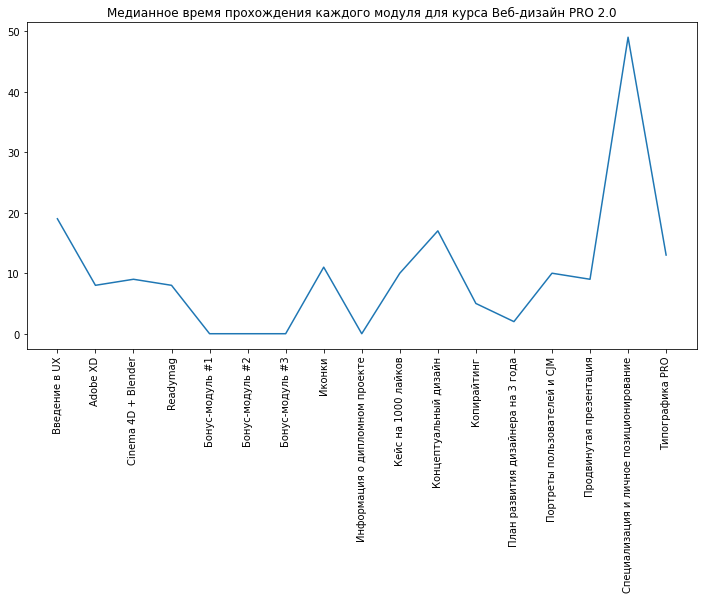

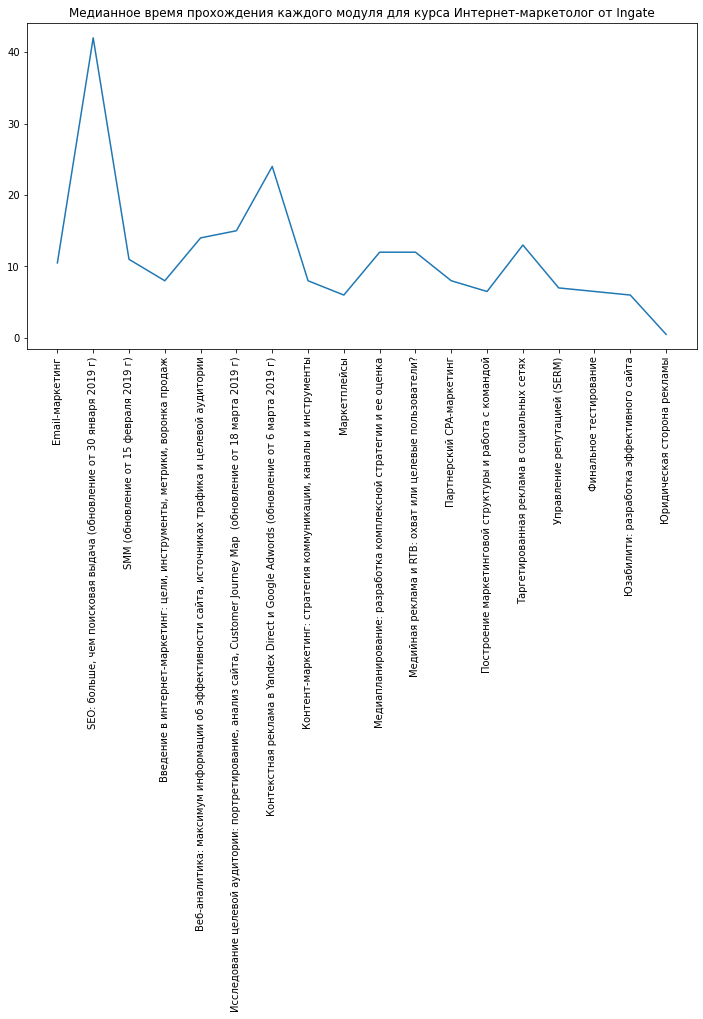

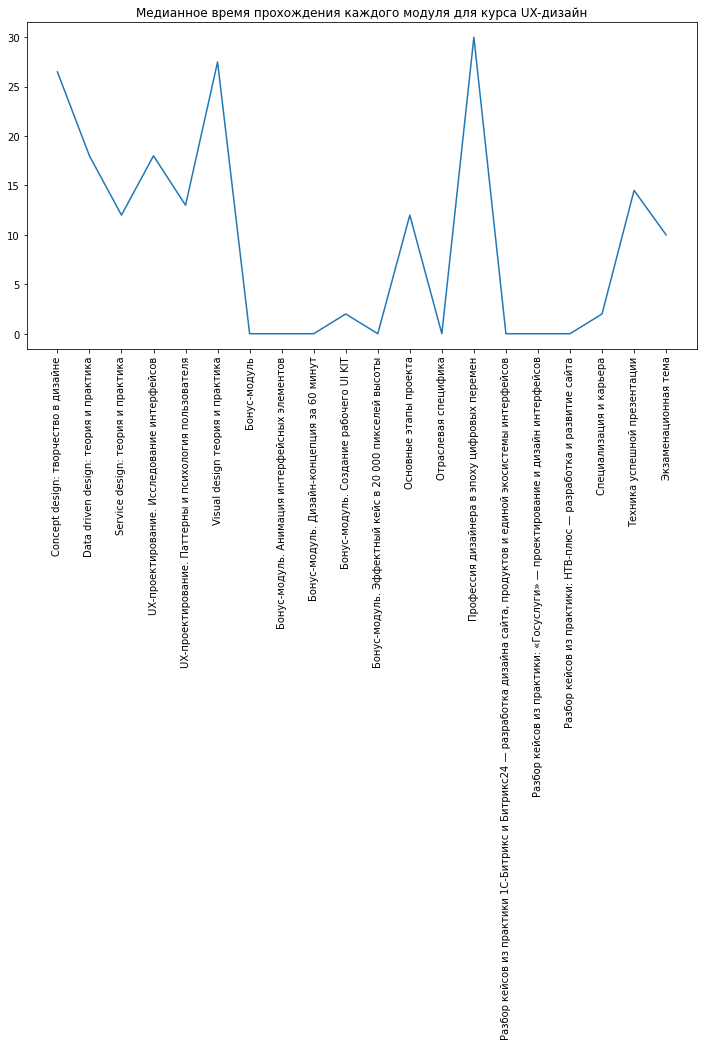

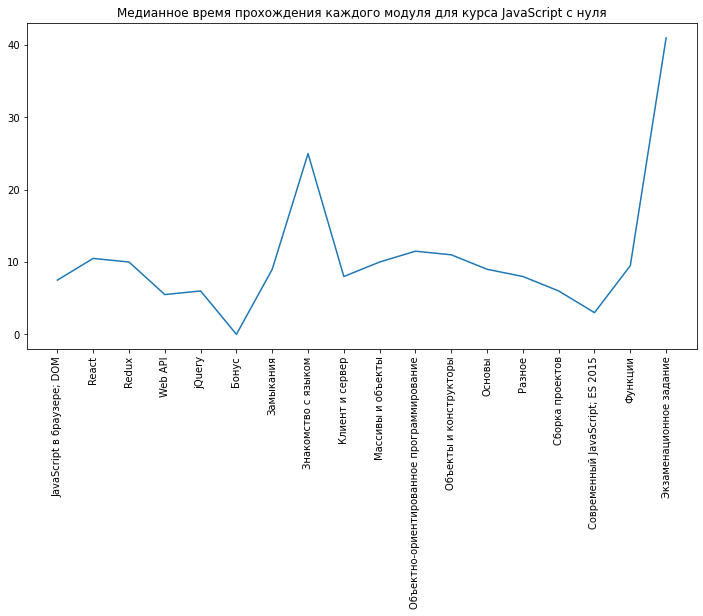

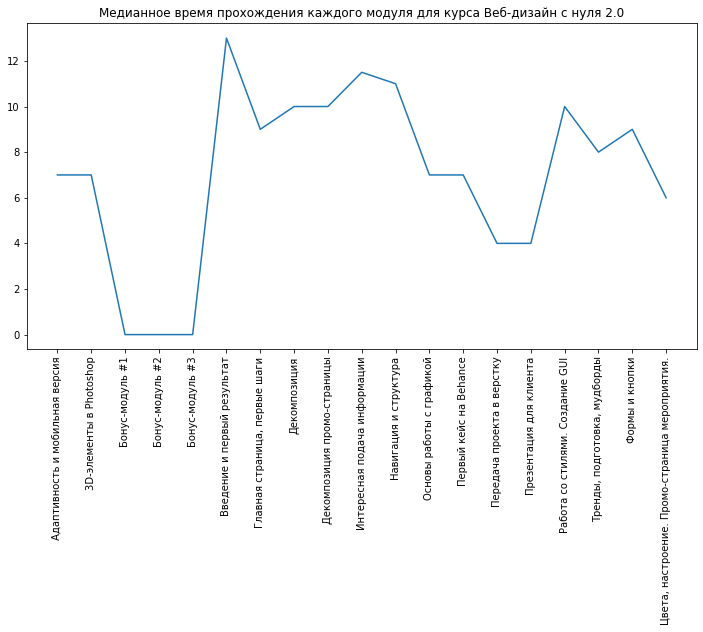

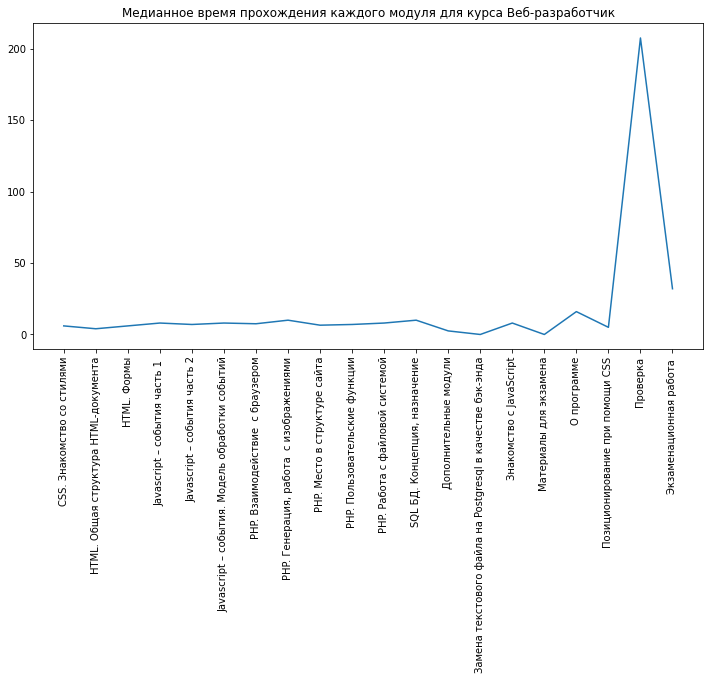

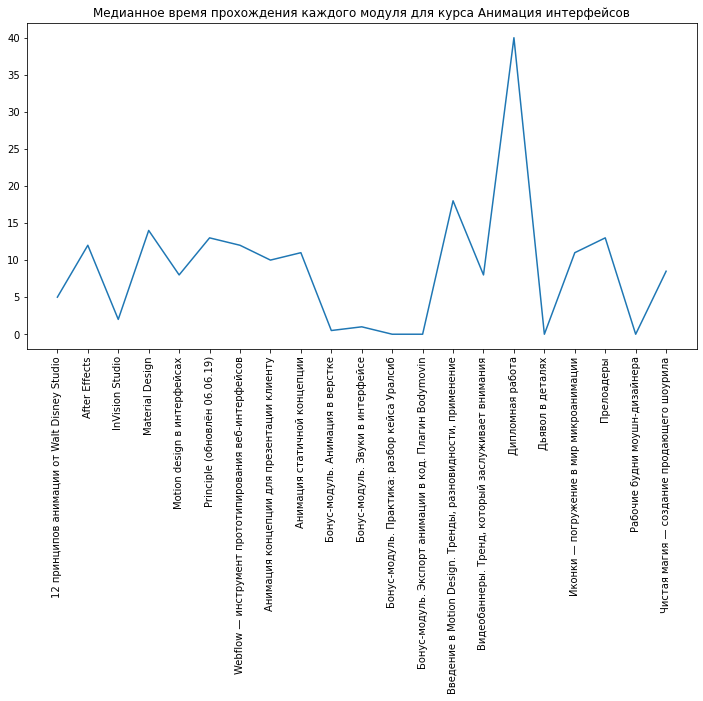

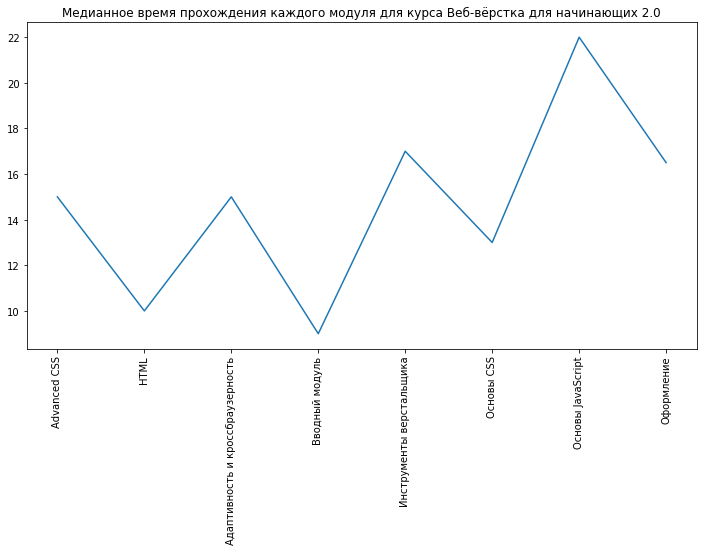

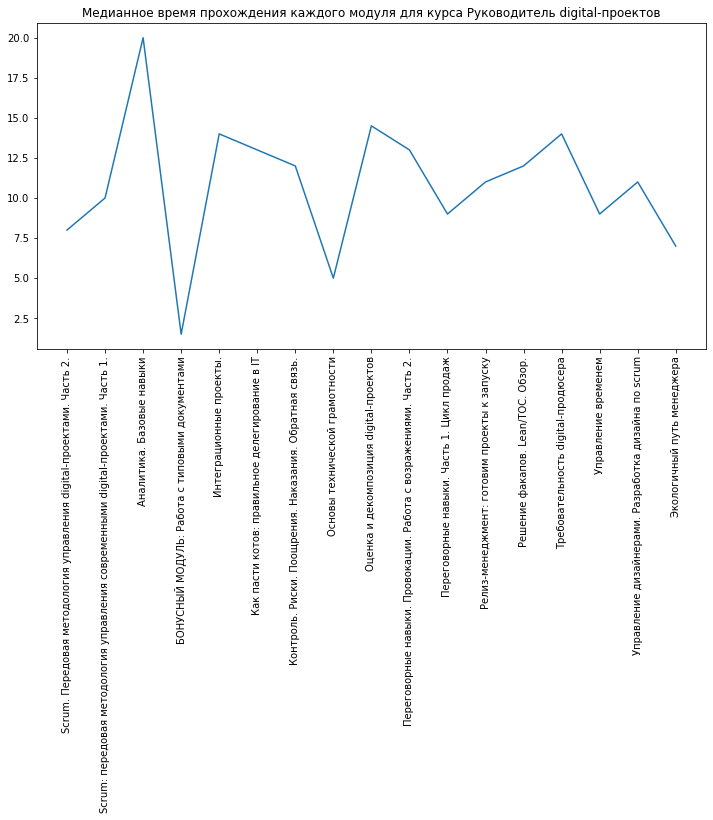

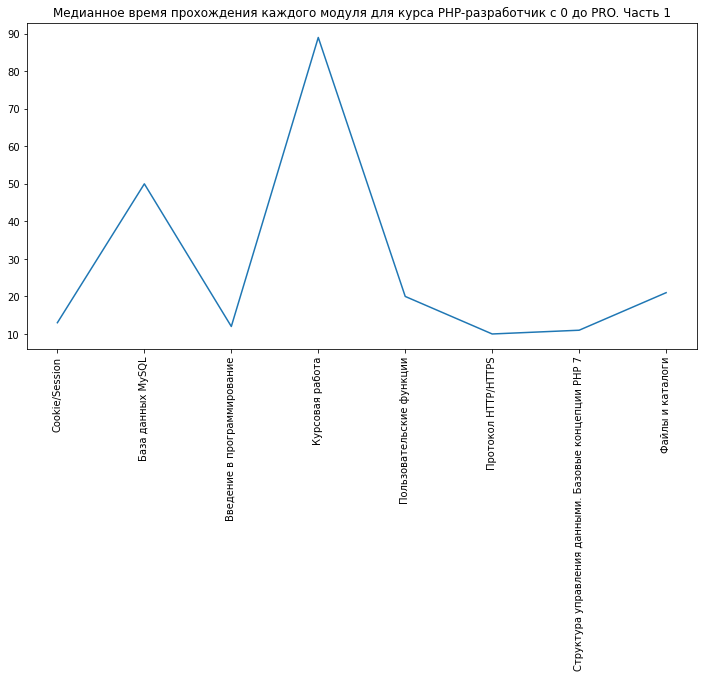

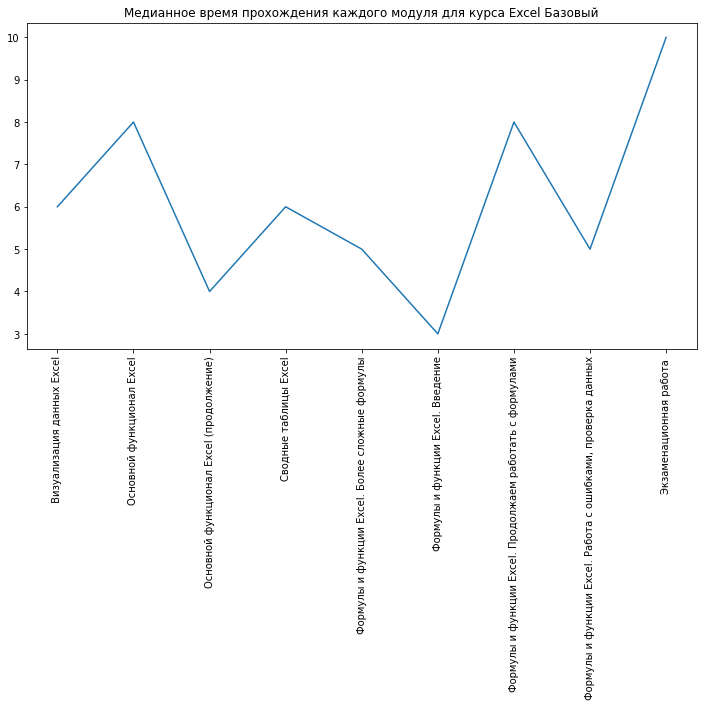

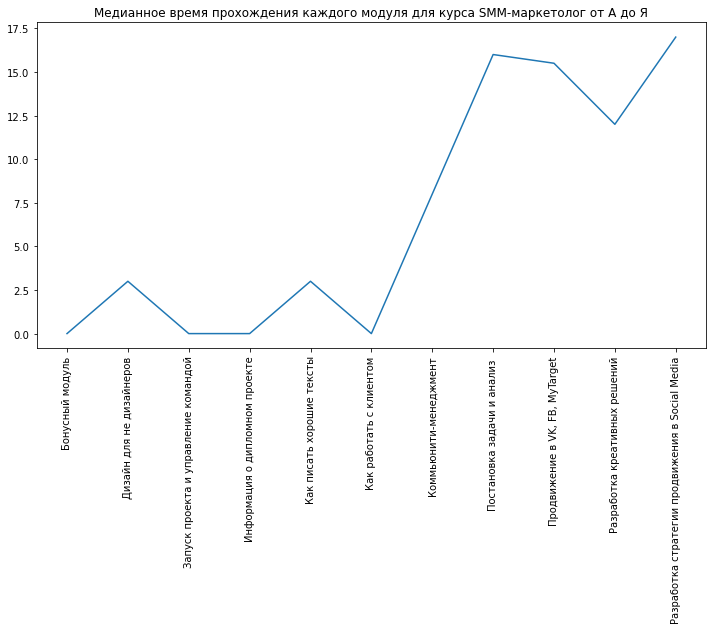

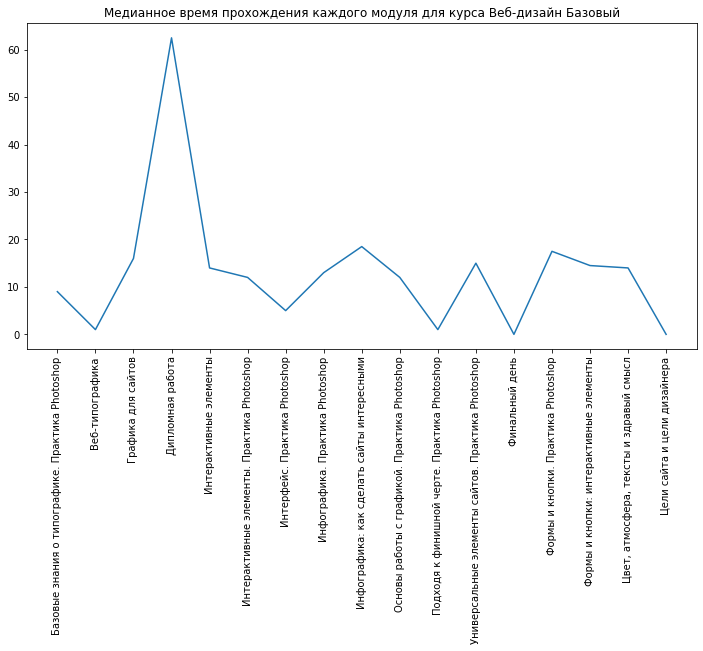

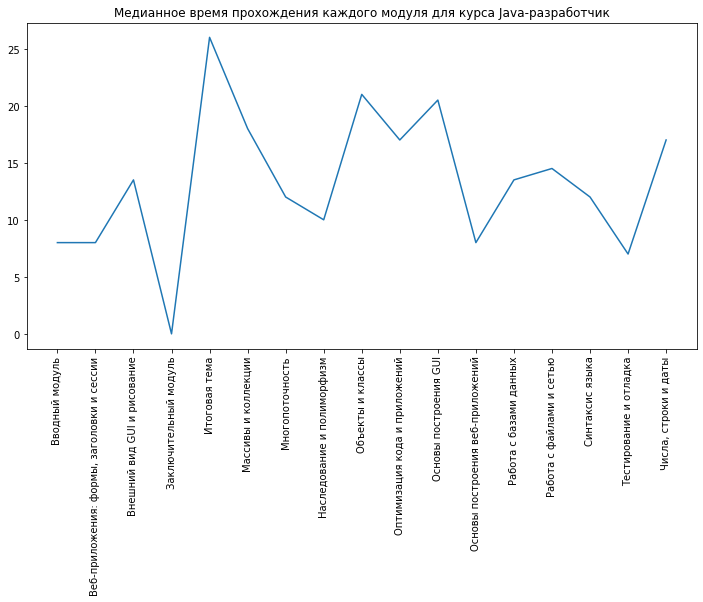

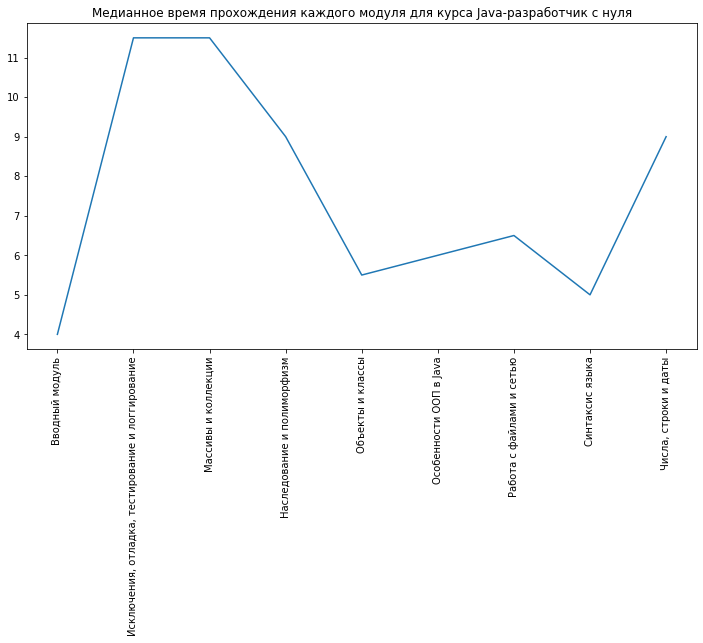

In [62]:
#3_2 line-graph с медианным временем прохождения каждого модуля для каждого курса

df_3_2 = problem_df_graph.reset_index()
for course in course_list:
    data3 = df_3_2[df_3_2['course_title'] == course]
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(data3.module_title, data3.median_time)
    ax.set_title(f'Медианное время прохождения каждого модуля для курса {course}')
    plt.xticks(rotation = 90)
    
plt.show()


In [16]:
#3_3 Медианное время выполнения домашней работы по месяцам

seasonality_df = problem_df.reset_index()
seasonality_df['module_finish'] = [str(i)[5:7] for i in seasonality_df['module_finish']]
seasonality_df = seasonality_df.groupby(['course_title', 'module_finish']).agg(median_time_monthly = ('delta', 'median'))
seasonality_df

median_time_monthly
course_title                  module_finish                     
Excel Базовый                 01                             5.0
                              02                             7.0
                              03                             6.0
                              04                             6.0
                              05                             6.0
...                                                          ...
Руководитель digital-проектов 08                            17.0
                              09                            13.0
                              10                            11.5
                              11                             9.0
                              12                            11.0

[171 rows x 1 columns]

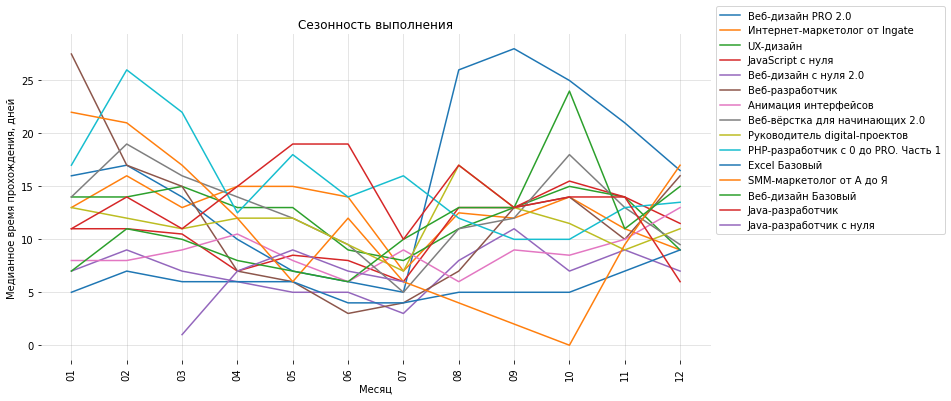

In [64]:
#3_4 line-graph, на который будут нанесены линии для каждого курса с медианным временем

fig, axs = plt.subplots(figsize=(12,6))
for course in course_list:
    axs.plot(seasonality_df.loc[course].index, seasonality_df.loc[course, 'median_time_monthly'], label = course)
    
axs.set_title('Сезонность выполнения')
axs.set_xlabel('Месяц')
axs.set_ylabel('Медианное время прохождения, дней')
plt.grid(color='grey', linestyle='-', linewidth=1, alpha = 0.2)
plt.xticks(rotation = 90)  
plt.box(on = None)
plt.legend(loc = 'best', bbox_to_anchor=(1, 0.1, 0, 1))
plt.show()

In [ ]:
#3_5 Выводы.

# Рассматривая график "Сезонность выполнения", где изображены линии медианного значения выполнения модулей в каждом курсе
# в течение года, можно заметить тенденции основного количества курсов к увеличению медианного времени начаиная с ноября
# по февраль, что имеет зависимость с приходом новых студентов. С февраля заметно снижение вплоть до марта.
# В апреле снова наблюдается подьем вплоть до мая, после которого в июне наблюдается заметная тенденция к снижению показателя.
# Начиная с июля по сентябрь заметно увеличение показателя медианного времени. В октябре снова наблюдается снижение.

# Общая картина медианной величины затраченного времени на выполнение модулей на каждом из курсов не показывает больших различий
# между курсами, за исключением курса "SMM-маркетолог от А до Я" в котором имеется модуль ""Информация о дипломном проекте",
# по видимости, на прохождение которого было затрачено очень мало времени.

# На графике наибольшее медианное время выполнения имеет курс "Веб-дизайн PRO 2.0", "Веб-разработчик",
# "PHP-разработчик с 0 до PRO".

## 4. Расчет конверсии

In [156]:
#4_1 Расчет конверсии перехода студентов из одного модуля в другой на каждом курсе

conv_df = main.copy()
conv_df = conv_df[conv_df['is_homework'] == True]
conv_df_start = conv_df.groupby(['course_title',
                                 'course_field',
                                 'module_number',
                                 'module_title']).agg(lesson_start = ('lesson_number' , 'min'),
                                                       student_count_start = ('student_id', 'nunique'))

conv_df_finish = conv_df[conv_df['status'] == 'done']
conv_df_finish = conv_df_finish.groupby(['course_title',
                                         'course_field',
                                         'module_number',
                                         'module_title']).agg(lesson_finish = ('lesson_number' , 'max'),
                                                       student_count_done = ('student_id', 'nunique'))
conv_df_start = conv_df_start.reset_index()
conv_df_finish = conv_df_finish.reset_index()

conv_df_all = conv_df_start.merge(conv_df_finish, how = 'left')
del conv_df_all['lesson_start']
del conv_df_all['lesson_finish']
conv_df_all.student_count_done = conv_df_all.student_count_done.shift(1)
conv_df_all['conv'] = conv_df_all['student_count_start'] / conv_df_all['student_count_done']
conv_df_all.set_index(['course_title','module_title'], inplace = True)

for i in list(conv_df_all.index.levels[0]):
    conv_df_all.drop(index = conv_df_all.loc[i].index[0], level = 1, inplace = True)
    
conv_df_all.fillna(0,inplace = True)    
conv_df_all

course_field  \
course_title                  module_title                                                      
Excel Базовый                 Основной функционал Excel (продолжение)                Business   
                              Формулы и функции Excel. Введение                      Business   
                              Формулы и функции Excel. Продолжаем работать с ...     Business   
                              Формулы и функции Excel. Более сложные формулы         Business   
                              Формулы и функции Excel. Работа с ошибками, про...     Business   
...                                                                                       ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                      Business   
                              Интеграционные проекты.                                Business   
                              Управление дизайнерами. Разработка дизайна по s...     Business   
                              Основы технической грамотности                         Business   
                              Контроль. Риски. Поощрения. Наказания. Обратная...     Business   

                                                                                  module_number  \
course_title                  module_title                                                        
Excel Базовый                 Основной функционал Excel (продолжение)                         2   
                              Формулы и функции Excel. Введение                               3   
                              Формулы и функции Excel. Продолжаем работать с ...              4   
                              Формулы и функции Excel. Более сложные формулы                  5   
                              Формулы и функции Excel. Работа с ошибками, про...              6   
...                                                                                         ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                              12   
                              Интеграционные проекты.                                        13   
                              Управление дизайнерами. Разработка дизайна по s...             14   
                              Основы технической грамотности                                 15   
                              Контроль. Риски. Поощрения. Наказания. Обратная...             16   

                                                                                  student_count_start  \
course_title                  module_title                                                              
Excel Базовый                 Основной функционал Excel (продолжение)                             434   
                              Формулы и функции Excel. Введение                                   398   
                              Формулы и функции Excel. Продолжаем работать с ...                  345   
                              Формулы и функции Excel. Более сложные формулы                      298   
                              Формулы и функции Excel. Работа с ошибками, про...                  263   
...                                                                                               ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                                    95   
                              Интеграционные проекты.                                              87   
                              Управление дизайнерами. Разработка дизайна по s...                   71   
                              Основы технической грамотности                                       66   
                              Контроль. Риски. Поощрения. Наказания. Обратная...                   64   

                                                                                  student_count_done  \
course_title                  module_title                   

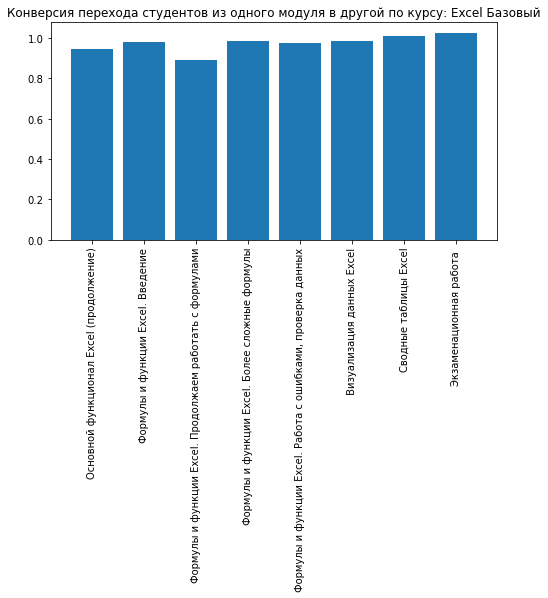

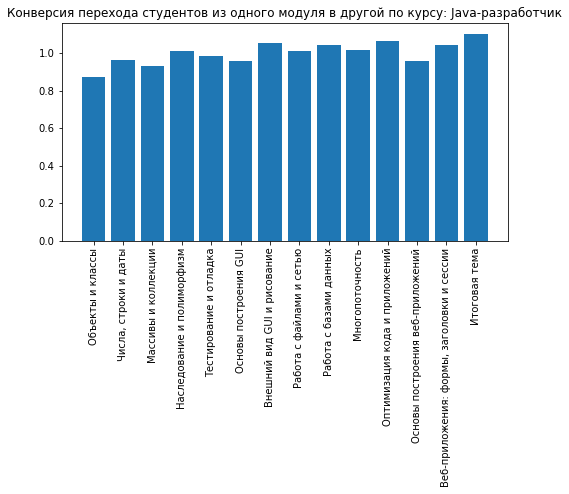

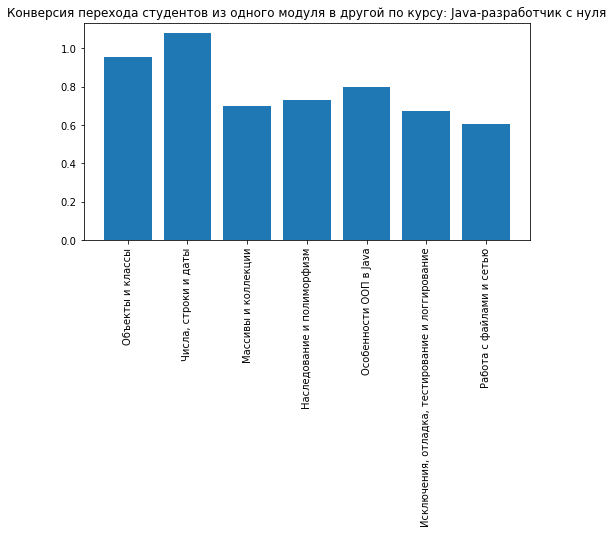

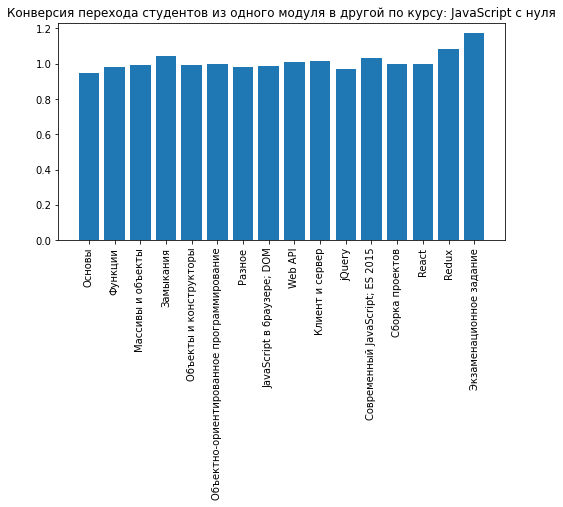

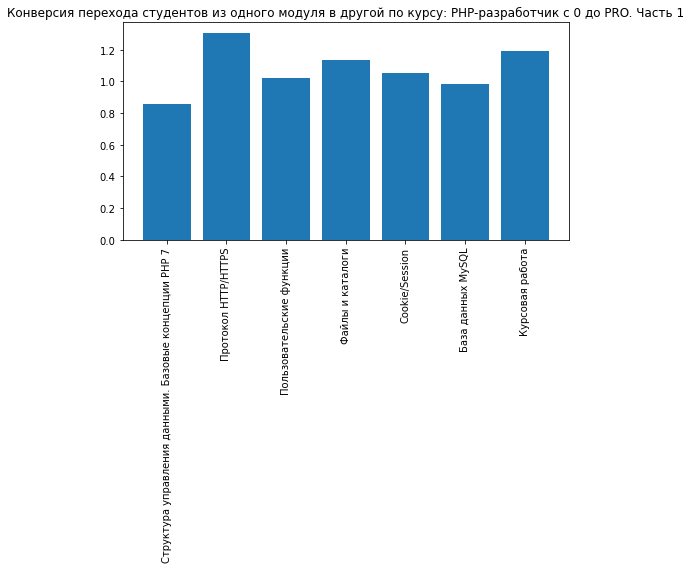

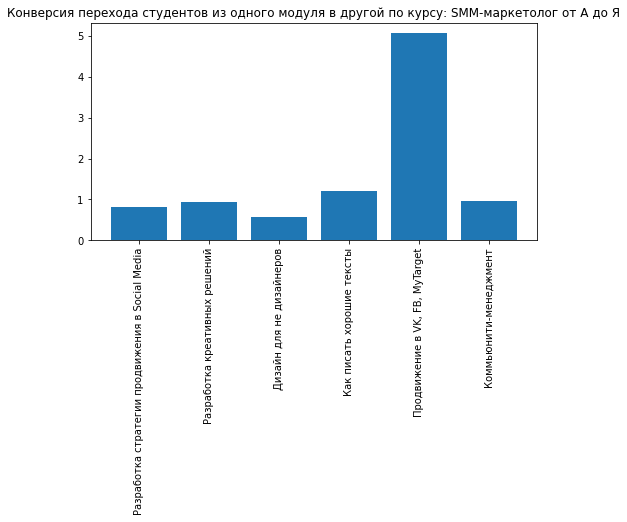

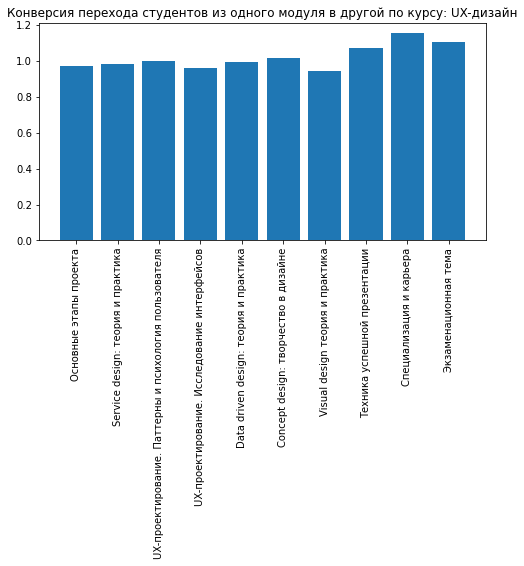

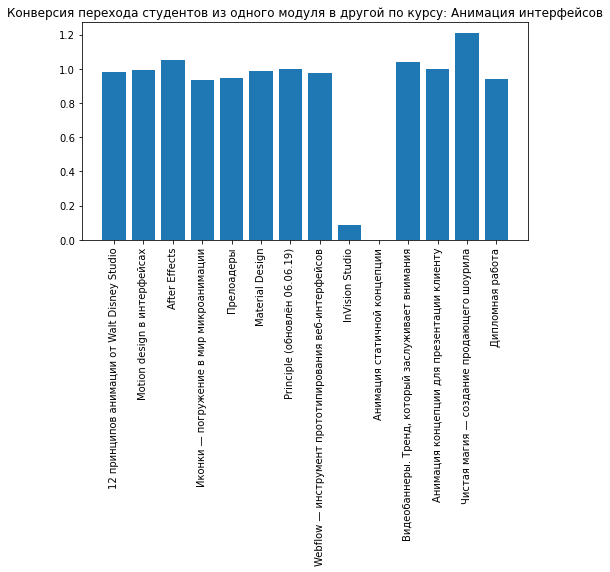

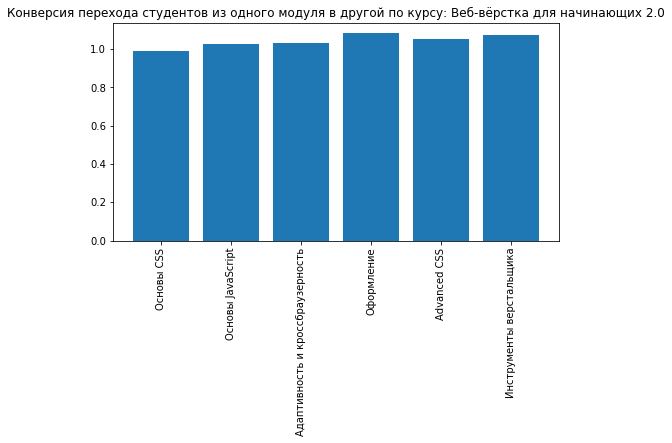

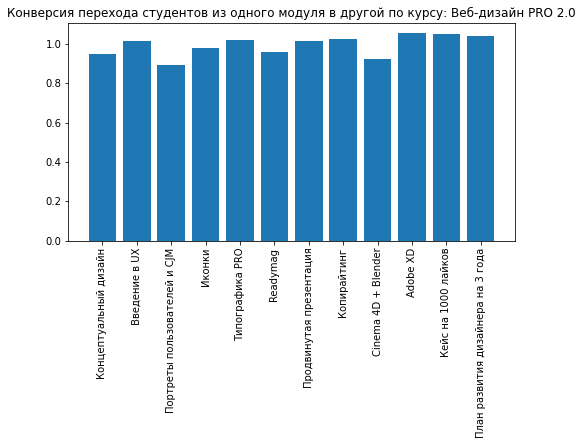

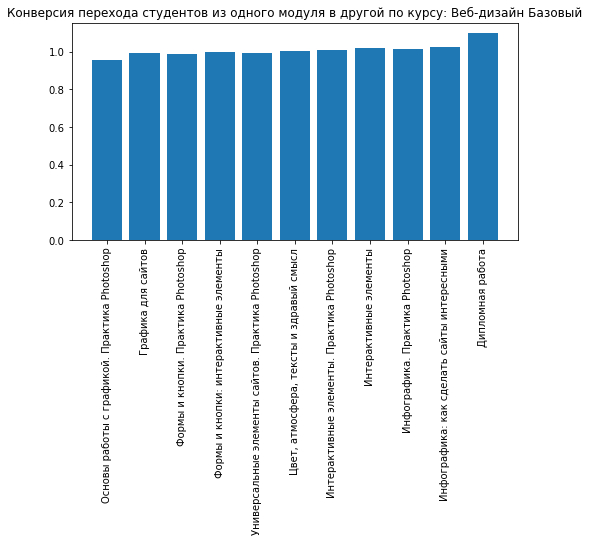

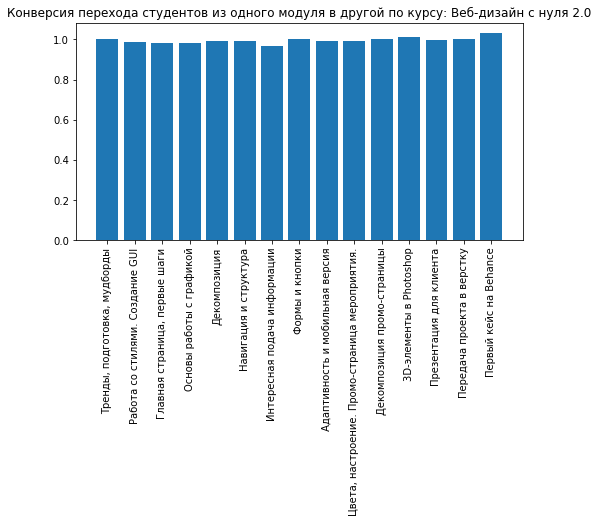

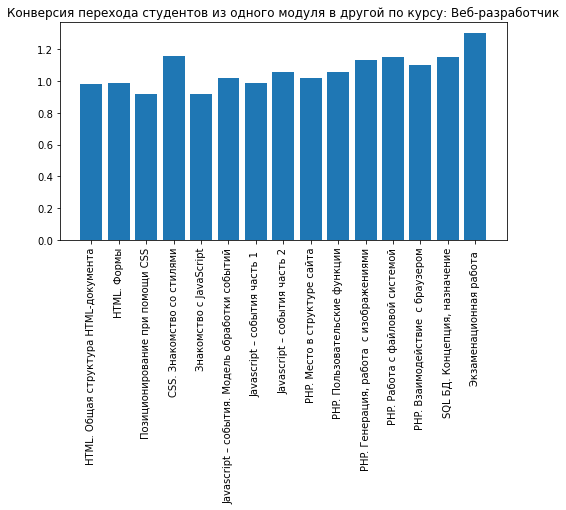

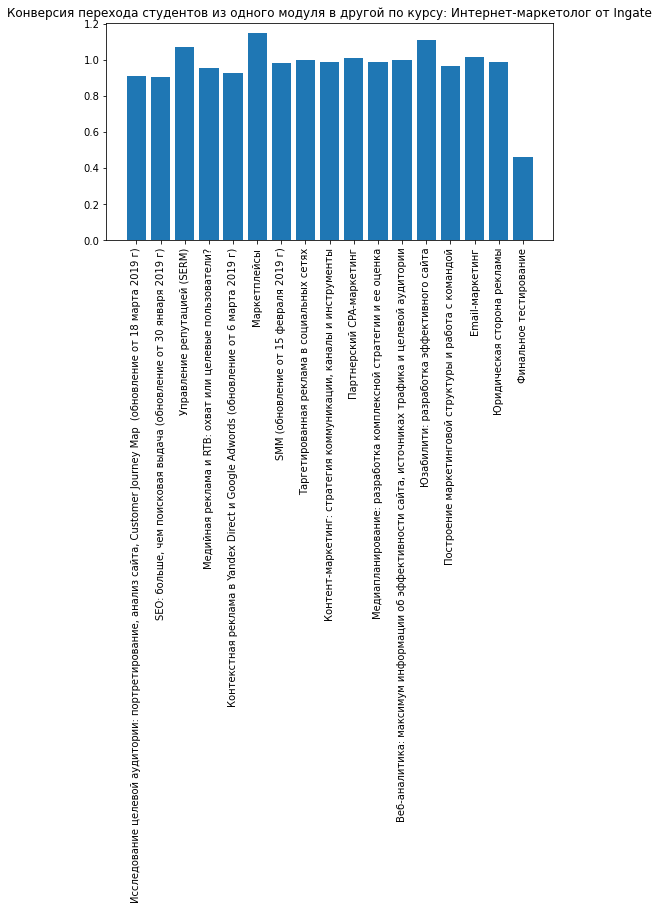

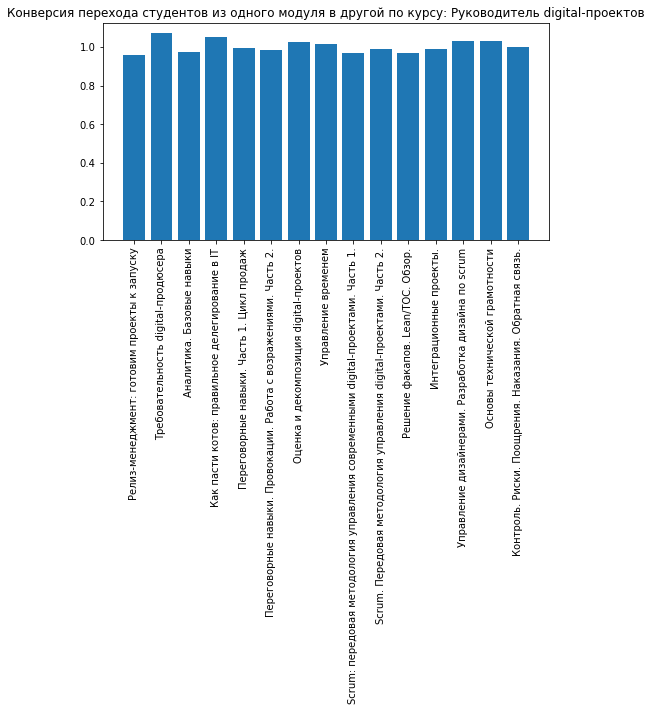

In [157]:
#4_2 bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе

for course in conv_df_all.index.levels[0]:
    fig, ax = plt.subplots(figsize=(8,4))
    xticks = (conv_df_all.loc[course].index)
    yticks = (conv_df_all.loc[course, 'conv'])
    ax.bar(xticks, yticks)
    ax.set_title(f'Конверсия перехода студентов из одного модуля в другой по курсу: {course}')
    plt.xticks(rotation = 90)
plt.show()

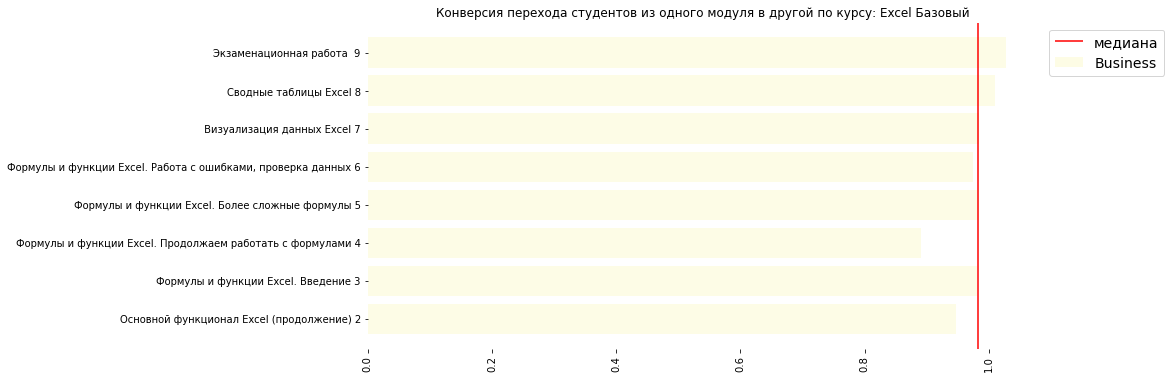

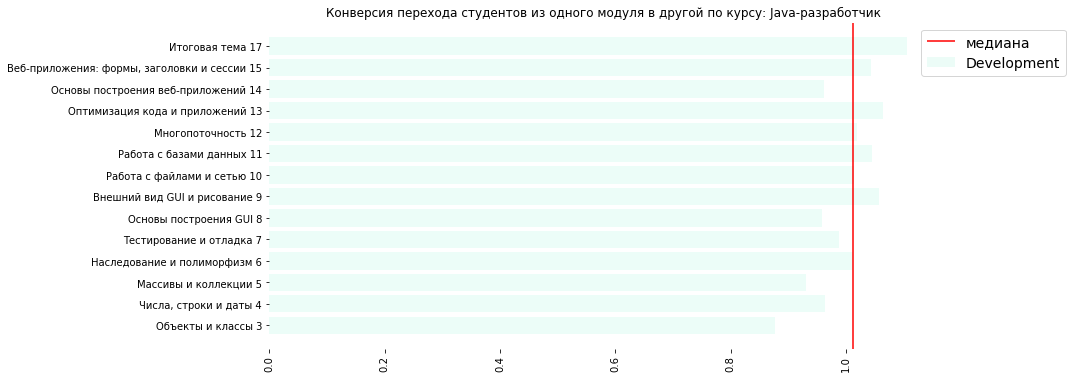

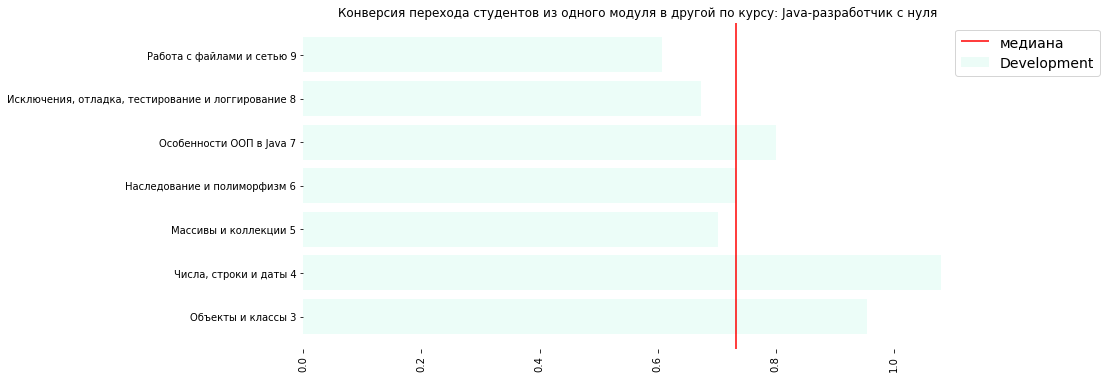

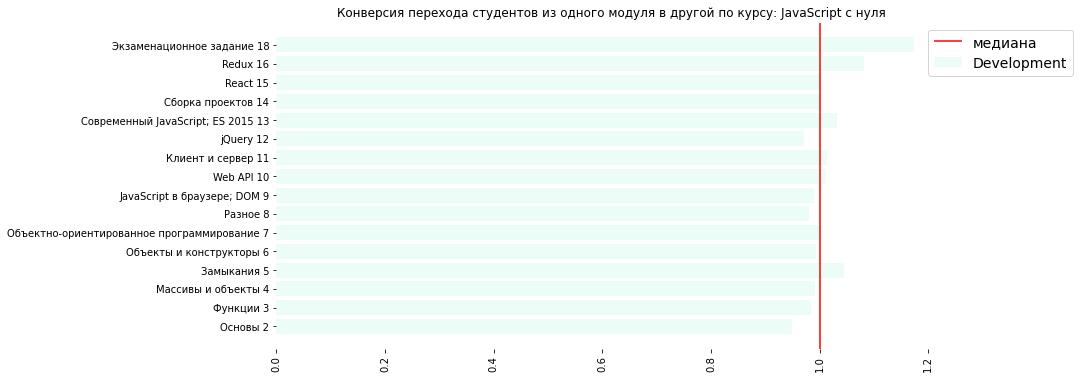

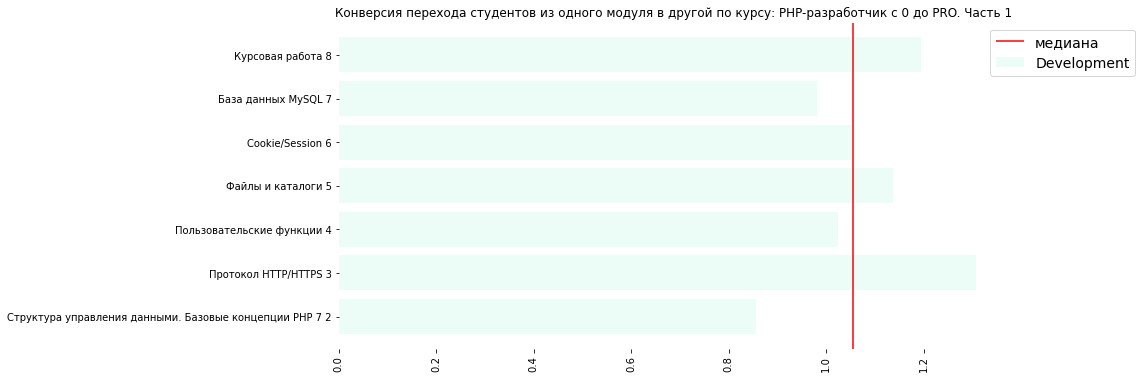

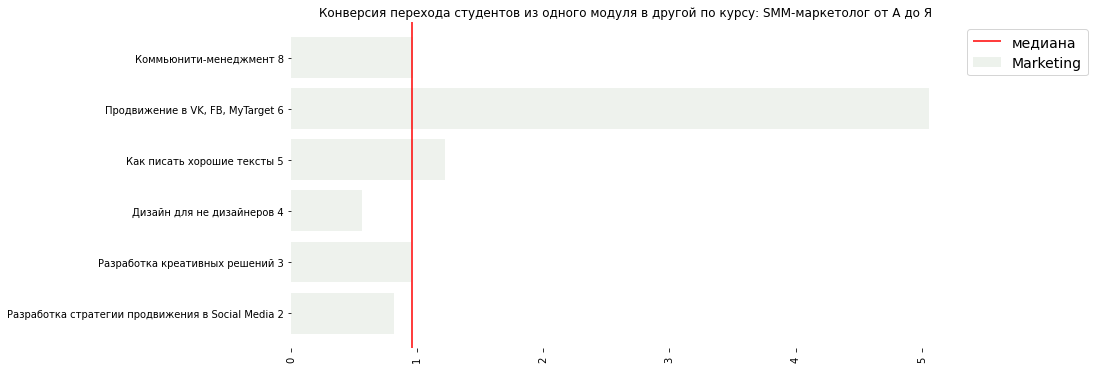

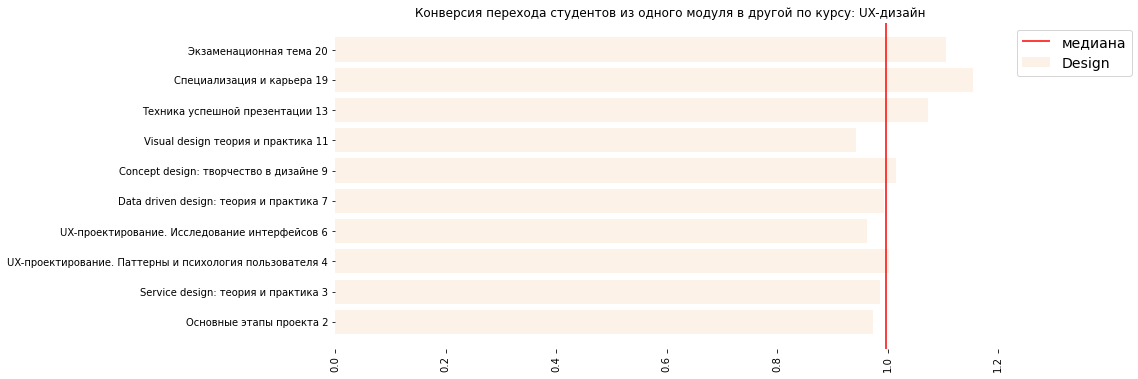

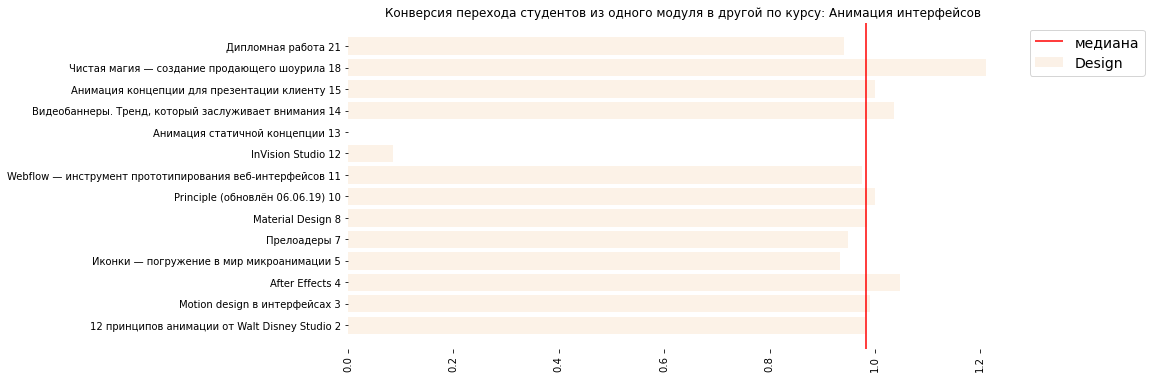

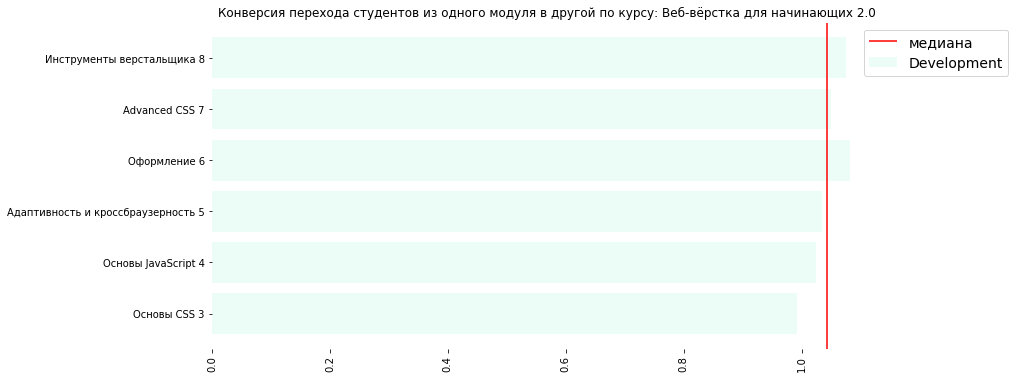

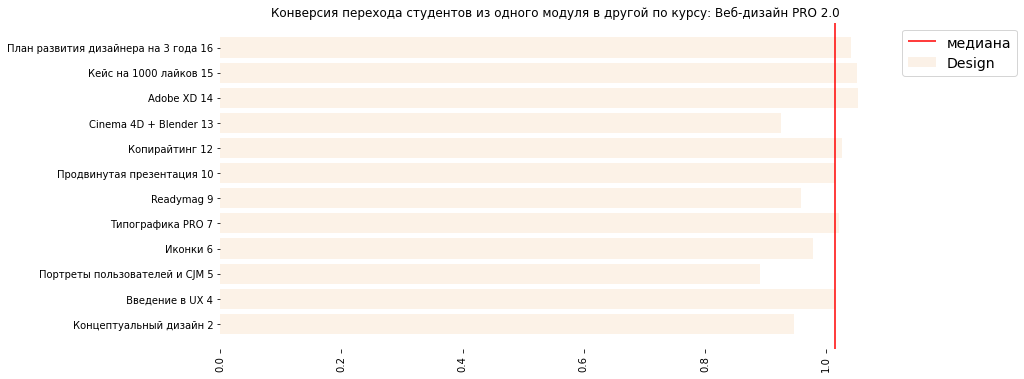

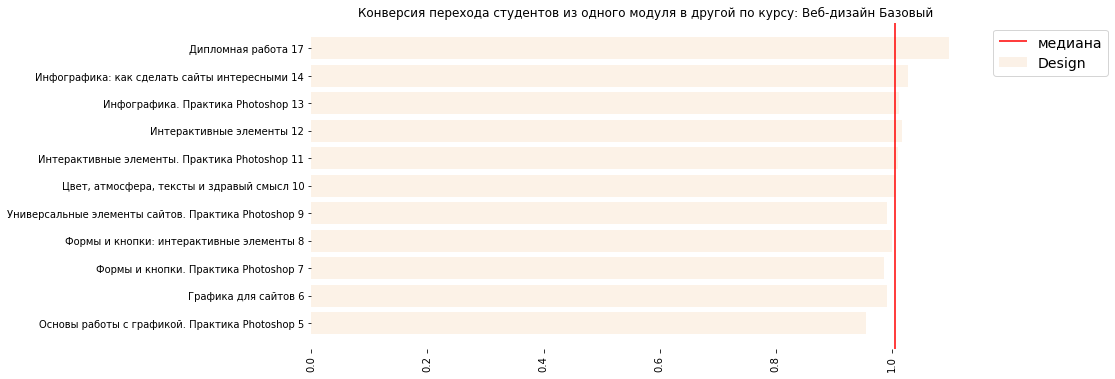

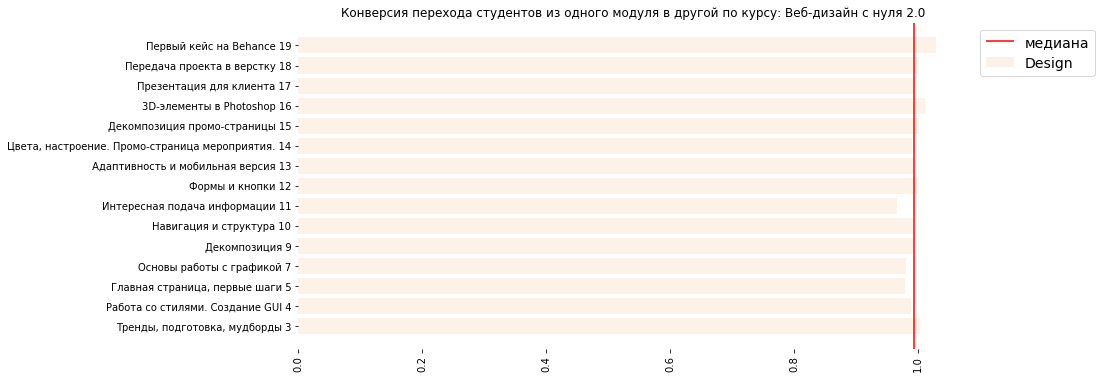

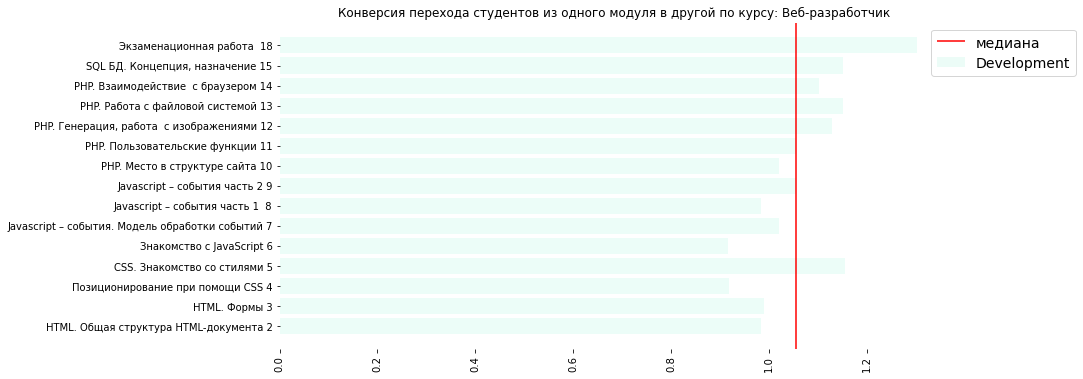

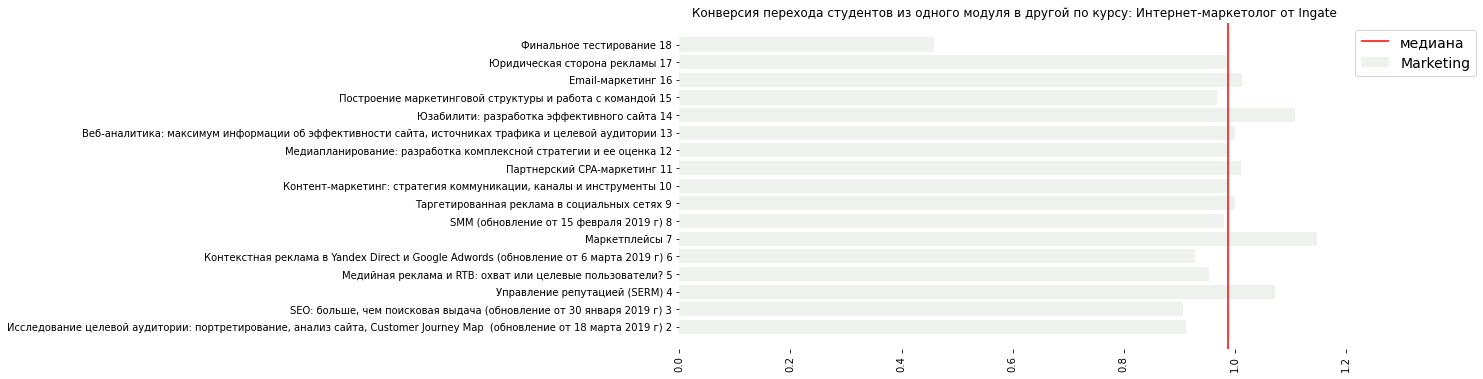

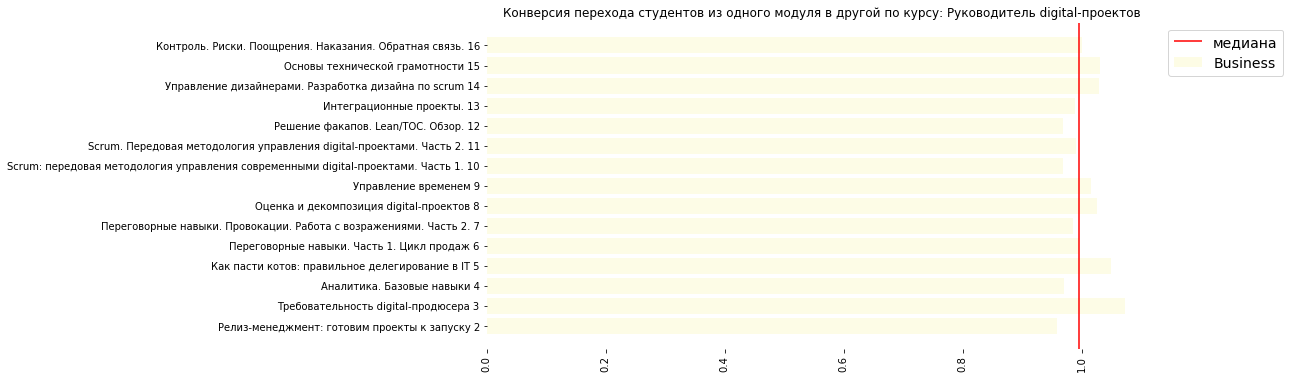

In [334]:
#4_3 Горизонтальный bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе

conv_df_all_gr = conv_df_all[:].reset_index()
conv_df_all_gr['module_title'] = conv_df_all_gr['module_title'].astype(str) +' '+conv_df_all_gr['module_number'].astype(str)
conv_df_all_gr.set_index(['course_title','module_title'], inplace = True)
course_field_list = [i for i in conv_df_all['course_field'].unique()]
color_list = np.random.rand(len(course_field_list), 3)

for course in conv_df_all.index.levels[0]:
    fig, ax = plt.subplots(figsize=(12,6))
    xticks = (conv_df_all_gr.loc[course].index)
    yticks = (conv_df_all_gr.loc[course, 'conv'])
    course_field = [i for i in conv_df_all_gr.loc[course, 'course_field'].values][0]
    color = color_list[course_field_list.index(course_field)]
    course_median = np.median(conv_df_all_gr.loc[course, 'conv'])
    ax.barh(xticks, yticks, color = color , alpha=0.1, label=course_field)
    ax.vlines(course_median, 0, 1, transform=ax.get_xaxis_transform(), color='red', label='медиана')
    ax.set_title(f'Конверсия перехода студентов из одного модуля в другой по курсу: {course}')
    plt.xticks(rotation = 90)
    plt.box(on=None)
    plt.legend(loc="best", bbox_to_anchor=(1, 0, 0.2, 1), fontsize=14)
plt.show()

In [345]:
#4_4 Выводы.

# Выполнив все поставленные расчеты и построив графики для наблюдения за конверсией студентов,
# можно выделить особенности для каждого модуля на каждом курсе. Учесть сложность в выполнении задач,
# трудности усвоения и популярности материала. Конверсия имеющая значение больше 1.0 означает,
# что за выполнение этого модуля принялось большее количество студентов чем количество завершивших предыдущий модуль.
# Нормальная конверсия равна 1.0, убывающая конверсия < 1.0. В частности:

# Excel Базовый
# Здесь практически все модули имеют одинаковый уровень конверсии, за исключением модуля "Формулы и функции Excel.
# Продолжаем работать с формулами", которая составляет чуть менее медианного значения конверсии.

# Java-разработчик
# На графике видно заметные колебания медианного значения конверсии. Здесь можно выделить модуль "Итоговая тема",
# значение конверсии которого несколько превышает медианное значение, равное чуть больше 1.0.
# Так же выделяются модули "Веб-приложения: формы, заголовки и сессии", "Оптимизация кода и приложений",
# "Внешний вид GUI и рисование" немного превышающие значение медианы. Модуль "Объекты и классы" имеет значение конверсии
# меньше медианного заметнее чем у остальных.

# Java-разработчик с нуля
# Заметное превышение медианного уровня конверсии наблюдается у модулей "Обьекты и классы",
# "Числа, строки и даты". Ниже линии медианы расположился модуль "Работа с файлами и сетью".

# JavaScript с нуля
# В модуле "Экзаменационное задание" можно наблюдать значительное повышение уровня конверсии относительно медианного значения.

# PHP-разработчик с 0 до PRO. Часть 1
# На графике конверсии выделяется последний модуль "Протокол HTTP/HTTPS". В модулях "Файлы и каталоги",
# "Курсовая работа" заметно небольшое отклонение от медианного значения конверсии в большую сторону.
# Наоборот в меньшую сторону отклонилось значение конверсии у модуля "Структура управления данными. Базовые концепции PHP 7"

# SMM-маркетолог от А до Я
# В этом курсе наблюдаются большие отклонения конверсии.
# Модуль "Продвижение VK, FB, MyTarget" имеет в разы большую конверсию по сравнению с остальными модулями данного курса.
# "Дизайн для недизайнеров" обладает заметной отрицательной конверсией.

# UX-Дизайн
# Здесь все модули имеют достаточно одинаковый уровень конверсии примерно равный медианному значению.

# Анимация интерфейсов
# Здесь можно выделить модуль "Чистая магия-создание продающего шоурила",
# который имеет заметное превышение конверсии над остальными модулями.
# Модуль "Анимация статичной концепции" имеет нулевую конверсию,
# так как в модуле "Invision Studio" помимо очень низкой конверсии, не выполнено ни одного домашнего задания.

# Веб-вёрстка для начинающих 2.0
# На графике незаметны значительные отклонения конверсии.

# Веб-дизайн PRO 2.0
# Небольшое отклонение от медианы в меньшую сторону имеет модуль "Портреты пользователей и CJM", а так же "Readymag", 
# "Иконки", "Cinema 4D + Blender" и "Концептуальный дизайн".

# Вэб-дизайн Базовый
# Заключительный модуль "Дипломная работа" имеет уровень конверсии несколько больший чем у остальных модулей данного курса.

# Веб-дизайн с нуля 2.0
# Здесь график не имеет значительных отклонений в показателях конверсии модулей от её медианного значения на всем курсе.

# Веб-разработчик
# Модули "Экзаменационная работа",
# "CSS. Знакомство со стилями" имеют наибольшие показатели в отличие от уровня конверсии всех остальных модулей курса.
# Наименьшие показатели имеют модули "Знакомство с JavaScript", "Позиционирование при помощи CSS".

# Интернет-маркетолог от Ingate
# На фоне относительно стабильных показателей конверсии у большинства модулей курса,
# заметно низкие показатели имеет модуль "Финальное тестирование". Модуль "Юзабилитию. Разработка эффективного сайта",
# "Маркетплейсы", "Управление репутацией (SERM)" имеет незначительное превышение мадианного уровня конверсии.

# Руководитель DIgital-проектов
# График показывает что практически у всех модулей уровень конверсии равен медианному.
# Небольшое превышение имеют модули "Как пасти котов. Правильное делегирование в IT" и "Требовательность digital-продюсера".

# В целом, рассмотрев уровни конверсии на всех курсах, можно заключить,
# что на каждом курсе медианное значение конверсии приблизительно равно единице.
# Это означает что основная масса студентов в равном количестве переходит от модуля к модулю.
# Так же можно заметить тенденцию к понижению конверсии у модулей, содержащих больше теоритических знаний, чем практических.
# В разы большую конверсию чем медианное значение имеют модули с наибольшей популярностю в использовании на практике.

## 5. Метрика успеваемости 

In [359]:
# Группировка данных на основании проваленных домешних работ в количестве больше двух. Т.к. одна неудача не показательна.

problem_stud = main.copy()
problem_stud = problem_stud[problem_stud['is_homework'] == True]
problem_stud = problem_stud[(problem_stud['status'] == 'fail') | (problem_stud['status'] == 'start')]
problem_stud = problem_stud.groupby(['course_title', 'student_id']).agg(fail_count = ('status','count'))
problem_stud = problem_stud[problem_stud['fail_count'] > 2]
problem_stud

fail_count
course_title                  student_id                                  
Excel Базовый                 26b6ec3d1876f5235a3974684ca5d395           3
                              6a8c3ae6677b5c45adc2a9885f21f724           3
                              ae83d5068fca1c60237dde9fabc80435           3
                              b01596005789f3cfa25cfb3d2befec23           3
                              b7efde183324d805cb6a8f144e4c19ce           3
...                                                                    ...
Руководитель digital-проектов 8050944800864a503f9d84b20162718c           9
                              d1121122c6378eeae3e8ab2b57a7fb5c           6
                              da32b74b91c309d7cf8fee0d738310b4           3
                              e0ada954b5ca6664b697efc1cb73e869           3
                              f3362156ff5091bf5b99533d73228ea5           3

[118 rows x 1 columns]

In [360]:
# Подсчет количества студентов удовлетворяющих заданному критерию.

problem_stud = problem_stud.reset_index()
problem_stud = problem_stud.groupby('course_title').agg(count_students = ('student_id','count'))
problem_stud.sort_values('count_students', ascending=False)

,count_students
course_title,
Веб-дизайн с нуля 2.0,27
Интернет-маркетолог от Ingate,16
Веб-разработчик,13
SMM-маркетолог от А до Я,12
UX-дизайн,11
Руководитель digital-проектов,9
Excel Базовый,8
Java-разработчик,7
Веб-дизайн Базовый,6


In [ ]:
# Выводы.

# В итоге лидирующие позиции в этом списке занимают курсы, которые не требуют серьезной предварительной подготовки,
# отсюда и такое количество "проблемных" студентов.
# Курс "Веб-разработчик" является самым молодым по медианному значению возрастов.
# Возможно отсюда идет зависимость к такому количеству неуспешных студентов.